# **Factors Related To Fatal Police Shootings**

# **Our goal is:**
*   To analyse and visualise relationships between the independent variable (like gender, location, arms, age etc.) and the shooting incident. We will also explore incidents at different granularities like city or state or the arm used.
*   Identify correlation between independent variables (if any).
*   To try and predict (using ML if possible) some dependent variables in the dataset based on the independent variables.
*   Try and combine with other datasets to draw deeper conclusions, for e.g. Population dataset (new addition)

**Data Source:**
* Data Police shootings (https://www.kaggle.com/mrmorj/data-police-shootings).
* Data source mentioned on Kaggle: https://www.washingtonpost.com/graphics/investigations/police-shootings-database/

**Motivation:**

*   Police brutality has been a raising concern across the world and this dataset about US Police Shootings seemed like a good place to start and take a deep dive into factors related to these shootings.
*   Further we wanted to verify if racial discrimination that the police has been accused of is reflected in actual data.
*   This dataset had scope to bring in new datasets like population metrics that would aid in deeper analysis.
*   Also, the scope to implement ML models was wide for this dataset given the multiple variables in it.

# **Setting up for data analysis**



Code to link with google drive and access the files:

In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/

# Code to go into the relevant project folder
%cd /gdrive/Shareddrives/'BA775 and BA780 Team 2A'

# Go to the link, select the google account and enter the authentication code that is generated

Mounted at /gdrive
/gdrive
/gdrive/Shareddrives/BA775 and BA780 Team 2A


Importing relevant libraries

In [3]:
# Please run to ensure depedencies are covered
!pip install plotly

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import Pretty as disp
import plotly.express as px
import math

Code snippet to display multiple objects:

In [5]:
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

Loading the input data file into a dataframe:

In [6]:
fpsd = pd.read_csv('fatal-police-shootings-data.csv')


# **Looking at the data**

In [7]:
# Number of rows and columns
sh = fpsd.shape
print("There are {} rows and {} columns.".format(sh[0], sh[1]))

There are 5416 rows and 14 columns.


In [8]:
fpsd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5416 entries, 0 to 5415
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       5416 non-null   int64  
 1   name                     5416 non-null   object 
 2   date                     5416 non-null   object 
 3   manner_of_death          5416 non-null   object 
 4   armed                    5189 non-null   object 
 5   age                      5181 non-null   float64
 6   gender                   5414 non-null   object 
 7   race                     4895 non-null   object 
 8   city                     5416 non-null   object 
 9   state                    5416 non-null   object 
 10  signs_of_mental_illness  5416 non-null   bool   
 11  threat_level             5416 non-null   object 
 12  flee                     5167 non-null   object 
 13  body_camera              5416 non-null   bool   
dtypes: bool(2), float64(1), 

In [9]:
fpsd.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


# **Cleaning the data**

**Null values:**

> We have nulls in *armed, age, gender, race, flee* columns but we have decided not to get rid of the rows as it will lead to a loss of 20% of the data. We treat the nulls as we work with those specific columns.

**Datatypes and values:**

> We had to change data type of date column to a datetime object. 
We also added Day of the week column to support exploratory analysis

In [10]:
fpsd['date'] =  pd.to_datetime(fpsd['date'])
assert fpsd['date'].dtype == 'datetime64[ns]'
fpsd['Day of Week'] = fpsd['date'].dt.day_name()

> Replacing the letters for Race column with the actual race names




In [11]:
fpsd = fpsd.replace(['W','B', 'H', 'A', 'N', 'O'], ['White, non-Hispanic', 'Black, non-Hispanic' ,'Hispanic', 'Asian', 'Native American', 'Other']);

> For few columns which were of importance to the analysis, we changed them to category type from object type


In [12]:
l = ['flee','gender', 'race', 'threat_level']
fpsd[l] = fpsd[l].astype('category')

> Checking the datatype changes:


In [13]:
fpsd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5416 entries, 0 to 5415
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       5416 non-null   int64         
 1   name                     5416 non-null   object        
 2   date                     5416 non-null   datetime64[ns]
 3   manner_of_death          5416 non-null   object        
 4   armed                    5189 non-null   object        
 5   age                      5181 non-null   float64       
 6   gender                   5414 non-null   category      
 7   race                     4895 non-null   category      
 8   city                     5416 non-null   object        
 9   state                    5416 non-null   object        
 10  signs_of_mental_illness  5416 non-null   bool          
 11  threat_level             5416 non-null   category      
 12  flee                     5167 non-

Checking how the data looks like now:


In [14]:
fpsd.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,Day of Week
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Friday
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,"White, non-Hispanic",Aloha,OR,False,attack,Not fleeing,False,Friday
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Saturday
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,"White, non-Hispanic",San Francisco,CA,True,attack,Not fleeing,False,Sunday
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Sunday


Checking the time period of the data

In [15]:
st = fpsd['date'].max().date()
en = fpsd['date'].min().date()
print("The data is available for the time period: {} to {} (YYYY-mm-dd).".format(en, st))

The data is available for the time period: 2015-01-02 to 2020-06-16 (YYYY-mm-dd).


# **Exploratory analysis**

**Correlation between features (Pearson method)**

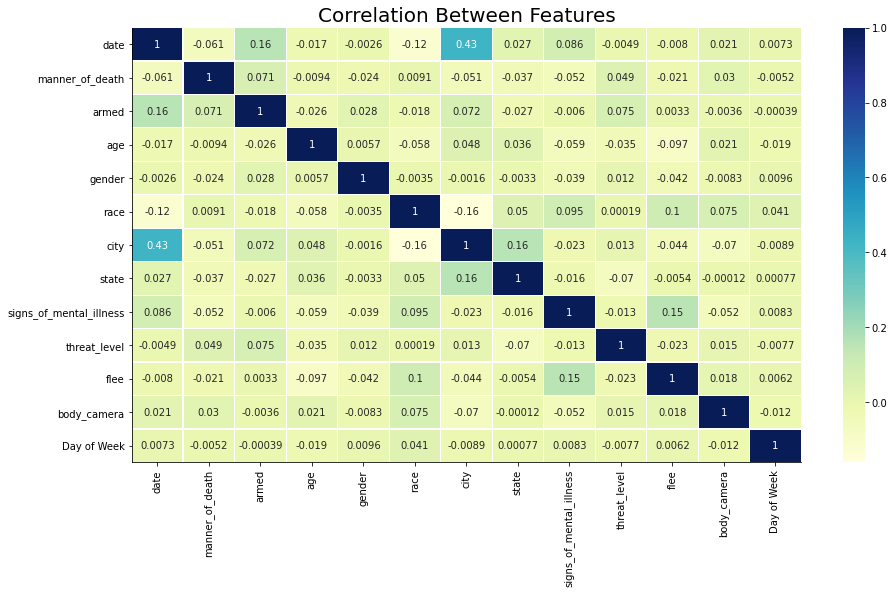

In [16]:
plt.figure(figsize=(15, 8))
fpsd_corr = fpsd.drop(['id', 'name'], axis=1)
corr = fpsd_corr.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.2, cmap="YlGnBu", annot=True)
plt.title('Correlation Between Features', fontsize=20)
sns.despine();

The correlation coefficient between most variables is close to 0 so there is no obvious correlation between the variables in this dataset. 

**Which state has the most fatal shootings?**

In [17]:
fpsd[fpsd['id'].notnull()].groupby('state')['state'].count().sort_values(ascending=False).head(8)

state
CA    799
TX    481
FL    350
AZ    254
CO    195
GA    182
OK    164
NC    156
Name: state, dtype: int64

**Heat map to show which states had the most fatal shootings**

In [18]:
shot = fpsd[fpsd['id'].notnull()].groupby('state')[[ 'state']].count()
shot.columns= ['state_count']
shot.reset_index(inplace = True)

fig = px.choropleth(shot, locations=shot['state'], color=shot['state_count'],locationmode="USA-states", title='Heat Map of Deaths per State',  width=1000, color_continuous_scale = 'Burg',scope="usa")
fig.show()

#Note: scroll over to see the State name and number of victims

California is the state with the most fatal police shootings, followed by Texas and Florida.

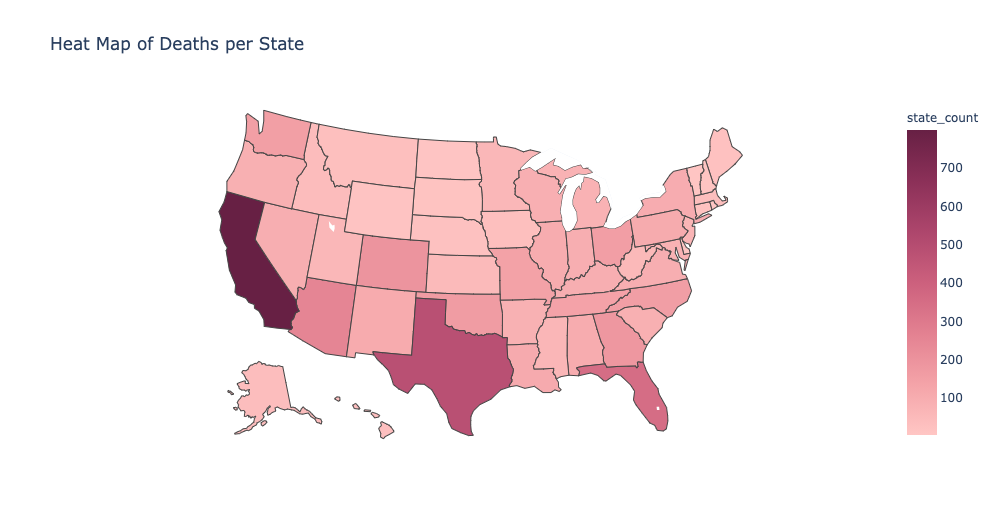

In [19]:
# Re-adding the above graph as an image in case it is not rendering on a different platform
from IPython.display import Image
Image(filename='Count_heatmap.png')

**Which city has the most fatal shootings?**

In [20]:
city = fpsd[fpsd['id'].notnull()].groupby('city')[[ 'city']].count()
city.columns= ['city_count']
city.reset_index(inplace = True)
city.sort_values('city_count', ascending=False, inplace=True)
city.head()

,city,city_count
1280,Los Angeles,85
1741,Phoenix,78
1009,Houston,57
1198,Las Vegas,45
1961,San Antonio,43


Los Angeles is the city with the most fatal police shootings with 85 deaths in the past 4 years and a half in the United States, followed by Phoenix with 78 deaths in the same time period.

**What day had the most shootings?**

In [21]:
fpsd[fpsd['manner_of_death'].notnull()].groupby('Day of Week')['Day of Week'].count().sort_values(ascending=False)

Day of Week
Wednesday    829
Tuesday      816
Thursday     810
Friday       761
Sunday       753
Monday       726
Saturday     721
Name: Day of Week, dtype: int64

**Visualising the same:**

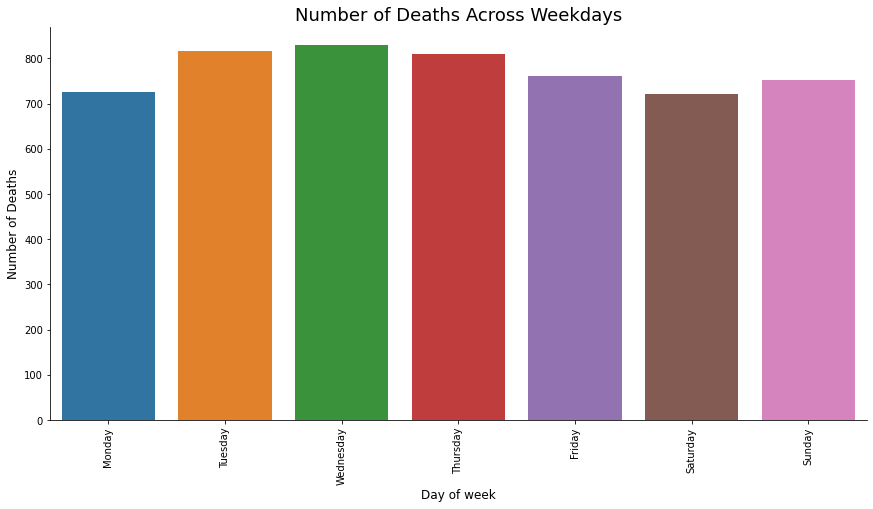

In [22]:
sns.catplot(x='Day of Week', data=fpsd, kind='count', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],\
            aspect=2, height=6)
plt.xticks(rotation=90)
plt.xlabel('Day of week', fontsize=12)
plt.ylabel('Number of Deaths', fontsize=12)
plt.title('Number of Deaths Across Weekdays', fontsize=18);

Wednesday has the highest number of deaths across all days of the week followed closely by Tuesday. Monday seems to have the lowest number of deaths. Out of the weekend (Saturday and Sunday), Sunday seems to have more deaths. 

**Trying some visualisations with age as the quantitative variable and other categorical variables in the dataset**

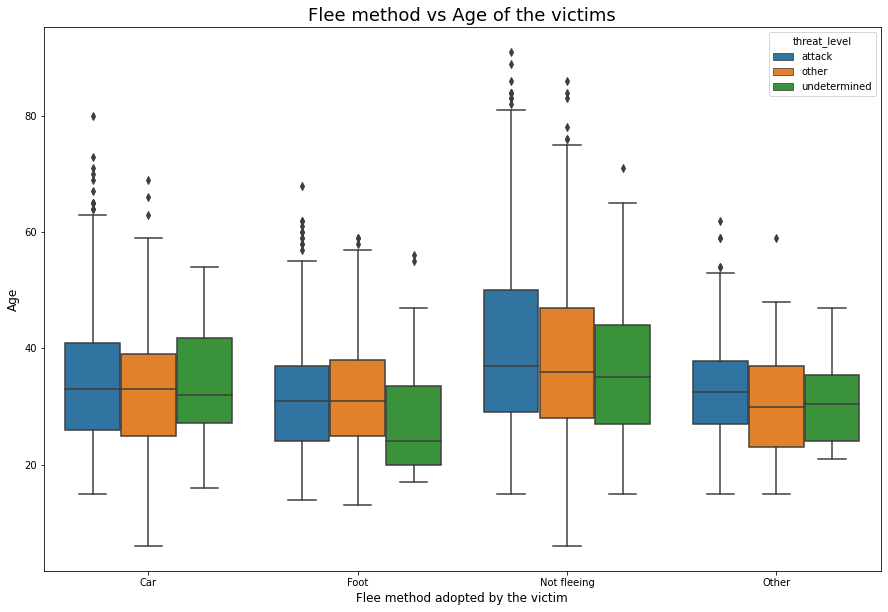

In [23]:
plt.figure(figsize=(15,10))
fleeAge = sns.boxplot(x="flee", y="age", data=fpsd, hue='threat_level')
plt.ylabel('Age', fontsize=12)
plt.xlabel('Flee method adopted by the victim', fontsize=12)
plt.title('Flee method vs Age of the victims', fontsize=18);

The flee method 'Not fleeing' seems to have the greatest variablility and median for all threat levels compared to the other categories. In contrast, 'Other' seems to have the least variability. Lastly, 'Foot' with the threat level 'undetermined' has the lowest median. 

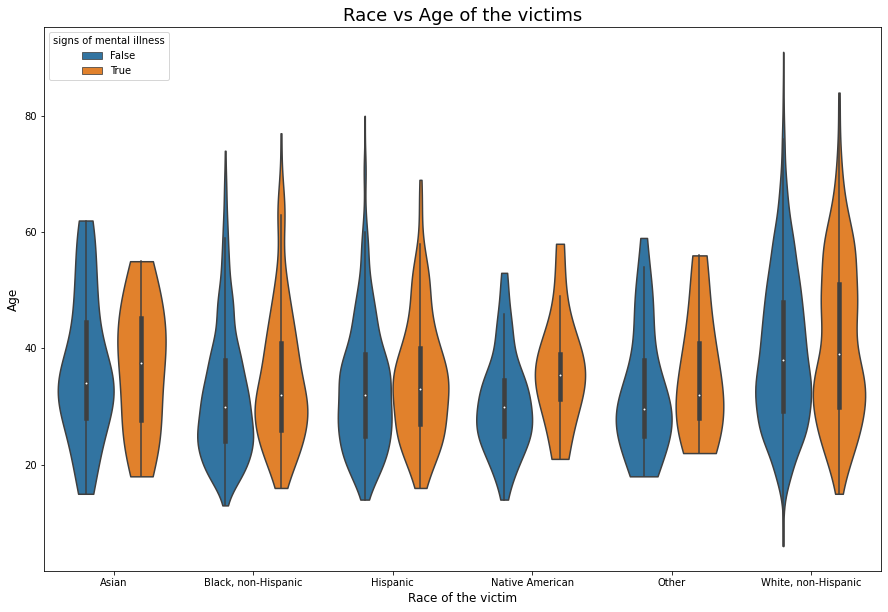

In [24]:
plt.figure(figsize=(15,10))
fleeAge2 = sns.violinplot(x="race", y="age", data=fpsd, hue='signs_of_mental_illness', cut=0)
plt.ylabel('Age', fontsize=12)
plt.xlabel('Race of the victim', fontsize=12)
plt.title('Race vs Age of the victims', fontsize=18)
plt.legend(loc = 'upper left', title= 'signs of mental illness');

White, non-hispanic has the greatest variability (with and without mental illness). Native american seems to have the least variability (excluding the 'Other' category because we are not sure what variety of races belong to it). 

**Looking at the timeseries of the shootings**

**The timeline of the fatal shootings annually**

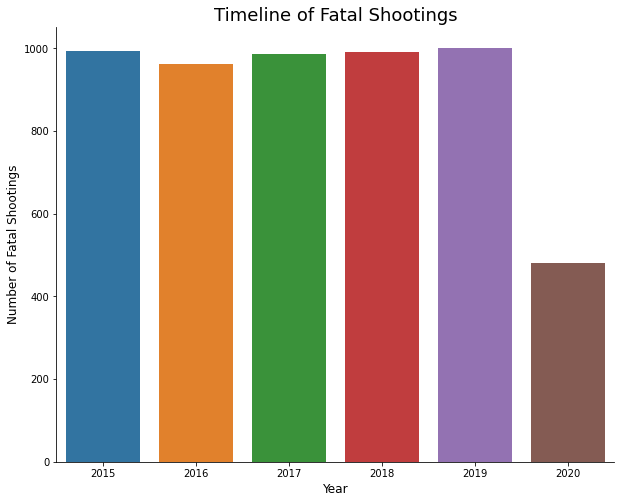

In [25]:
plt.figure(figsize=(10,8))
sns.countplot(data=fpsd, x=fpsd['date'].dt.year)
sns.despine()
plt.xlabel('Year',fontsize=12)
plt.ylabel('Number of Fatal Shootings',fontsize=12)
plt.title('Timeline of Fatal Shootings', fontsize=18);

We can see that the number of shootings has not reduced and has more or less remained steady across the years. Please note that the number for 2020 is around half of the number for other years as we only have half year (Jan-Jun) data for the year 2020.

In [26]:
# Filtering the date-wise data
tseries = fpsd[fpsd['date'].dt.year < 2020].groupby('date')[['date']].count()  # excluding 2020 as only half year data is available for 2020
tseries.columns = ['count']
tseries.head()

,count
date,
2015-01-02,2
2015-01-03,1
2015-01-04,3
2015-01-05,1
2015-01-06,4


**Visualising the timeseries for monthly fatal shootings**

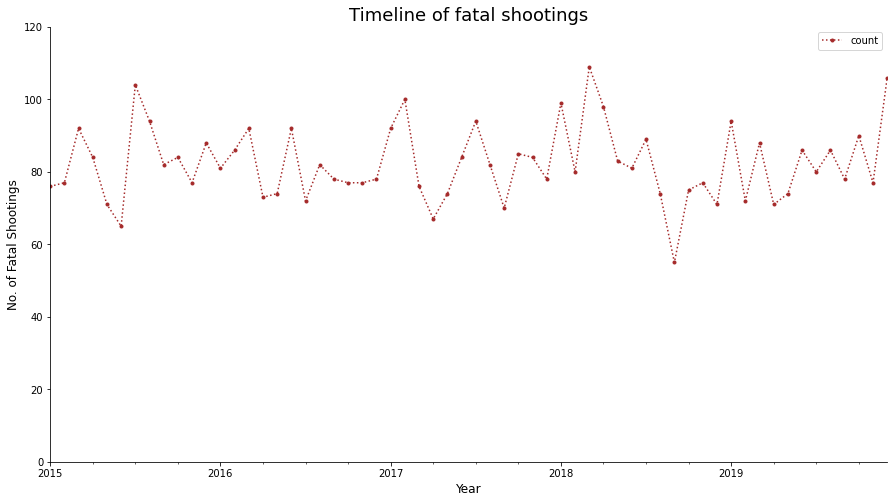

In [27]:
tseries.resample('M').sum().plot(style = ':.', figsize=(15,8), color='brown')
plt.yticks(np.arange(0,130, 20))
plt.xlabel('Year',fontsize=12)
plt.ylabel('No. of Fatal Shootings',fontsize=12)
plt.title('Timeline of fatal shootings', fontsize=18)
sns.despine();

Checking some statistics about the number of shootings monthly:

In [28]:
tseries.resample('M').sum().describe()

,count
count,60.000000
mean,82.250000
std,10.396585
min,55.000000
25%,75.750000
50%,81.000000
75%,88.250000
max,109.000000


When looking at the monthly timeseries, we observe that number of shootings monthly on average was 82 with standard deviation of 10 and thus no particular pattern here. Since no annual/ monthly pattern is observed, we used the whole dataset for our further analysis, rather than sectioning it year-wise.

**How old are most of the victims?**

In [29]:
# Creating a new column called 'age_group' and count the number for each age group
fpsd['age_group'] = pd.cut(fpsd['age'].dropna(), bins=[0,10,20,30,40,50,60,70,80,90,100])
fpsd.groupby(by="age_group", dropna=True).count()['id']

age_group
(0, 10]         2
(10, 20]      369
(20, 30]     1487
(30, 40]     1517
(40, 50]      933
(50, 60]      579
(60, 70]      227
(70, 80]       51
(80, 90]       15
(90, 100]       1
Name: id, dtype: int64

**Visualization for age distribution (without grouping)**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



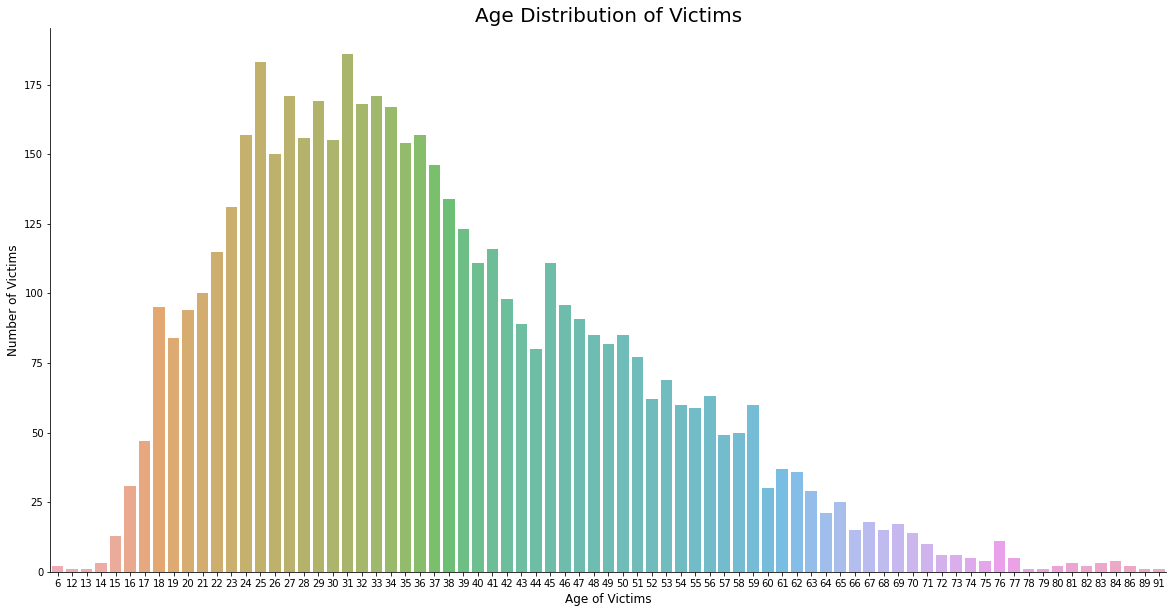

In [30]:
plt.figure(figsize=(20, 10))
sns.countplot(fpsd['age'].dropna().astype(int), alpha=0.8)
plt.title('Age Distribution of Victims', fontsize=20)
plt.xlabel('Age of Victims', fontsize=12)
plt.ylabel('Number of Victims', fontsize=12)
sns.despine();

**Checking the distribution of Age across the dataset**

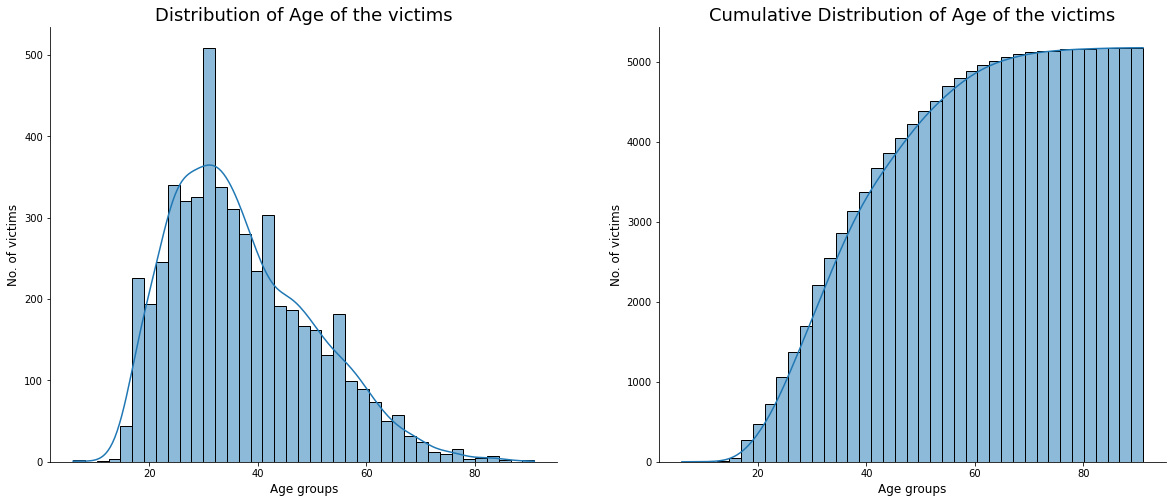

In [31]:
fig, ax = plt.subplots(1,2,figsize=(20, 8))
sns.histplot(x=fpsd['age'], ax=ax[0], kde=True)
ax[0].set_xlabel('Age groups', fontsize=12)
ax[0].set_ylabel('No. of victims', fontsize=12)
ax[0].set_title('Distribution of Age of the victims', fontsize=18);
sns.histplot(x=fpsd['age'], cumulative=True, ax=ax[1], kde=True)
ax[1].set_xlabel('Age groups', fontsize=12)
ax[1].set_ylabel('No. of victims', fontsize=12)
ax[1].set_title('Cumulative Distribution of Age of the victims',fontsize=18)
sns.despine();


When looking at the age distribution of the victims, we found it was skewed to the right and the age of the victims was concentrated in 20 to 40.

**Did they flee at the time of shooting?**

In [32]:
fpsd_flee = fpsd.groupby(by="flee", dropna=True).count()['id'].sort_values(ascending = False).to_frame()
fpsd_flee.rename(columns={'id': 'number'})

,number
flee,
Not fleeing,3411
Car,900
Foot,692
Other,164


**Visualization for the flee method of the victims**

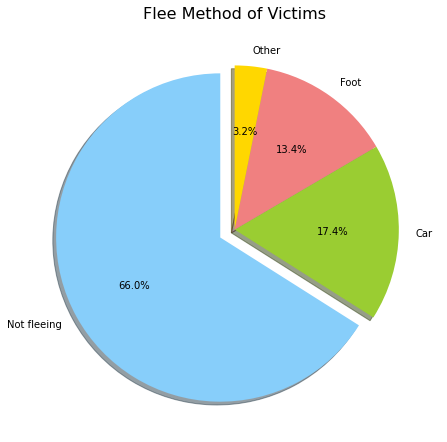

In [33]:
labels = 'Not fleeing', 'Car', 'Foot', 'Other'
colors = ['lightskyblue', 'yellowgreen', 'lightcoral', 'gold']
sizes = [3411, 900, 692, 164]
explode = (0.1, 0, 0, 0) 
fig1, ax1 = plt.subplots(figsize = (10,6))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, colors = colors)
plt.tight_layout()
plt.title("Flee Method of Victims", fontsize = 16);
plt.show()

We see that most of the victims did not flee at the time of shootings, followed by fleeing by car and on foot.

**What was the racial profile of the victims?**

In [34]:
fpsd[fpsd['id'].notnull()].groupby('race')['race'].count().sort_values(ascending=False)

race
White, non-Hispanic    2476
Black, non-Hispanic    1298
Hispanic                902
Asian                    93
Native American          78
Other                    48
Name: race, dtype: int64

**Visualization for the racial profile of the victims**

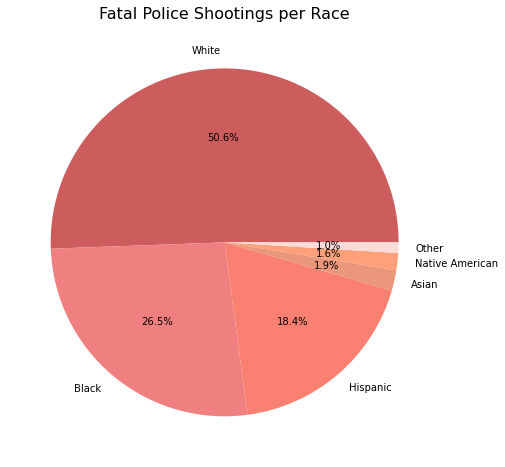

In [35]:
plt.figure(figsize = (8,8))
colors = ['#CD5C5C','#F08080','#FA8072','#E9967A', '#FFA07A',  '#fadbd8']
plt.pie(fpsd['race'].value_counts(), labels = ['White', 'Black', 'Hispanic', 'Asian', 'Native American', 'Other'] ,autopct="%.1f%%", colors = colors)
plt.title("Fatal Police Shootings per Race", fontsize = 16);

White people represent half of the victims, followed by Black people who represent a quarter of the victims whereas the Hispanics represent less than 20%. Native Americans and Asians both represent less than 2% of the victims.

**What arms did the victims possess? (Shows the unique weapon that the victims possessed)**

In [36]:
unique_weapon=fpsd[fpsd['id'].notnull()].groupby('armed')['armed'].unique()
unique_weapon

armed
Airsoft pistol              [Airsoft pistol]
BB gun                              [BB gun]
BB gun and vehicle      [BB gun and vehicle]
Taser                                [Taser]
air conditioner            [air conditioner]
                               ...          
vehicle and gun            [vehicle and gun]
vehicle and machete    [vehicle and machete]
walking stick                [walking stick]
wasp spray                      [wasp spray]
wrench                              [wrench]
Name: armed, Length: 93, dtype: object

In [37]:
fpsd[fpsd['id'].notnull()].groupby('armed')['armed'].count().sort_values(ascending=False)

armed
gun               3060
knife              792
unarmed            353
toy weapon         186
undetermined       164
                  ... 
grenade              1
flagpole             1
fireworks            1
cordless drill       1
Airsoft pistol       1
Name: armed, Length: 93, dtype: int64

**Count of each weapon(s)**

In [38]:
# Getting the top 10 weapons possessed
fpsd_arm = fpsd['armed'].groupby(fpsd['armed']).count().sort_values(ascending = False).to_frame()
fpsd_arm.columns = ['count']
fpsd_arm.reset_index(inplace=True)
fpsd_arm.loc[11:, 'armed'] = 'other'
fpsd_arm = fpsd_arm.groupby('armed')['count'].sum().sort_values(ascending = False)
fpsd_arm

armed
gun               3060
knife              792
unarmed            353
other              301
toy weapon         186
undetermined       164
vehicle            139
unknown weapon      79
machete             43
Taser               26
ax                  24
sword               22
Name: count, dtype: int64

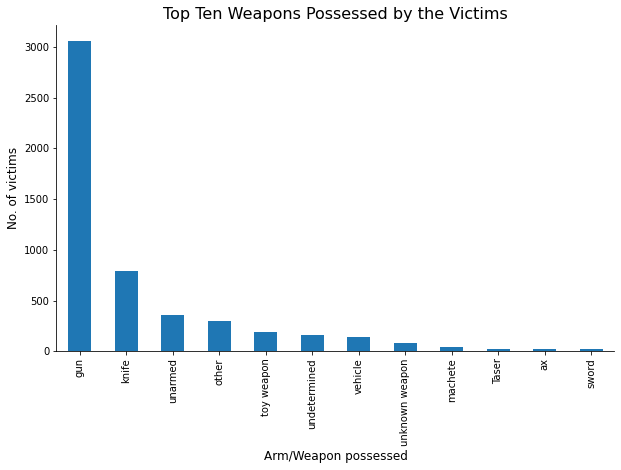

In [39]:
plt.figure(figsize = (10,6))
fpsd_arm.plot(kind='bar')
plt.title("Top Ten Weapons Possessed by the Victims", fontsize = 16)
plt.ylabel('No. of victims', fontsize=12)
plt.xlabel('Arm/Weapon possessed', fontsize=12)
sns.despine();

There are 93 different types of weapons that the victims possessed. We discovered that gun is the most common type of arm followed by knife.

# **Exploratory Phase Conclusion:**

*   We discovered that California had the most deaths by fatal police shootings, followed by Texas.
*   Among the cities, the maximum fatal shootings happened in LA, followed by Phoenix.
*   We see that most of the victims were White but this metric in itself does not showcase any relevant information. We will later on try and see the same by using racial population density and get more insights.
* Since 96% of the victims were male, we did not look further into a gender relation
* There are 93 different types of weapons that the victims possessed. We discovered that gun is the most common type of arm followed by knife.
*   We see that out of all seven days of the week, Wednesday has the most shootings, followed closely by Tuesday. Saturday being the day that the least shootings have occured.
*   When looking at the timeseries, we observe that there is no pattern as such in the number of shootings across the years. Also number of shootings monthly on average was 82 with standard deviation of 12 and thus no particular pattern here as well. Therefore, we used the whole dataset for our further analysis rather than sectioning it year-wise. Please note that we have data for only half year of the 2020.
*   We found that the age distribution of victims was skewed to right and the age of the victims was concentrated in 20 to 40. 
*   We see that age has the greatest variability (IQR is the largest), when the method of flee is "Not Fleeing." . 
*   Regarding race and age, we can see thee greatest variability in age seems to be within the White Non-Hispanic population with and without mental illness whereas the category for Native Americans with and without mental illness seems to have the least variabliity. 








# **Code for STORYLINE phase**

**California has the highest number of fatal shootings thus we decided to focus our analysis for the state of California.**

In [40]:
fpsd[fpsd['id'].notnull()].groupby('state')['state'].count().sort_values(ascending=False).head(10)

state
CA    799
TX    481
FL    350
AZ    254
CO    195
GA    182
OK    164
NC    156
OH    155
WA    152
Name: state, dtype: int64

**Visualization of the deaths on a state level**

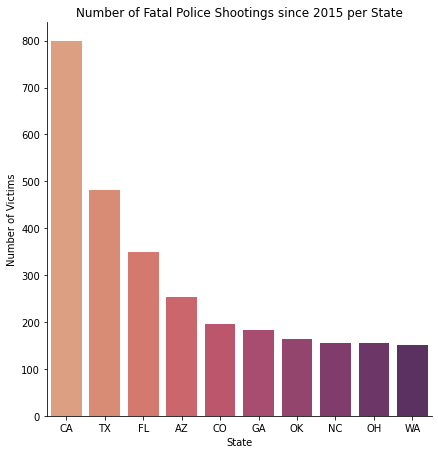

In [41]:
state_order = ['CA', 'TX', 'FL', 'AZ', 'CO', 'GA', 'OK', 'NC', 'OH', 'WA']
sns.catplot(x='state', data= fpsd, kind='count',height=6, palette = 'flare', order = state_order)
plt.title('Number of Fatal Police Shootings since 2015 per State') 
plt.xlabel('State')
plt.ylabel('Number of Victims');

**Filtering to get only CA values into a new dataframe**

In [42]:
CA = fpsd[fpsd['state']=='CA']
CA.head(3);

**Filtering on age in California**

In [43]:
fpsd_age_ca = CA.groupby(by="age_group", dropna=True).count().sort_values(by ='id',ascending = False)['id'].to_frame()
fpsd_age_ca.rename(columns={'id': 'number'})

,number
age_group,
"(20, 30]",245
"(30, 40]",216
"(40, 50]",137
"(50, 60]",63
"(10, 20]",55
"(60, 70]",18
"(70, 80]",3
"(80, 90]",1
"(0, 10]",0


**Visualization of the distribution of age in CA**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



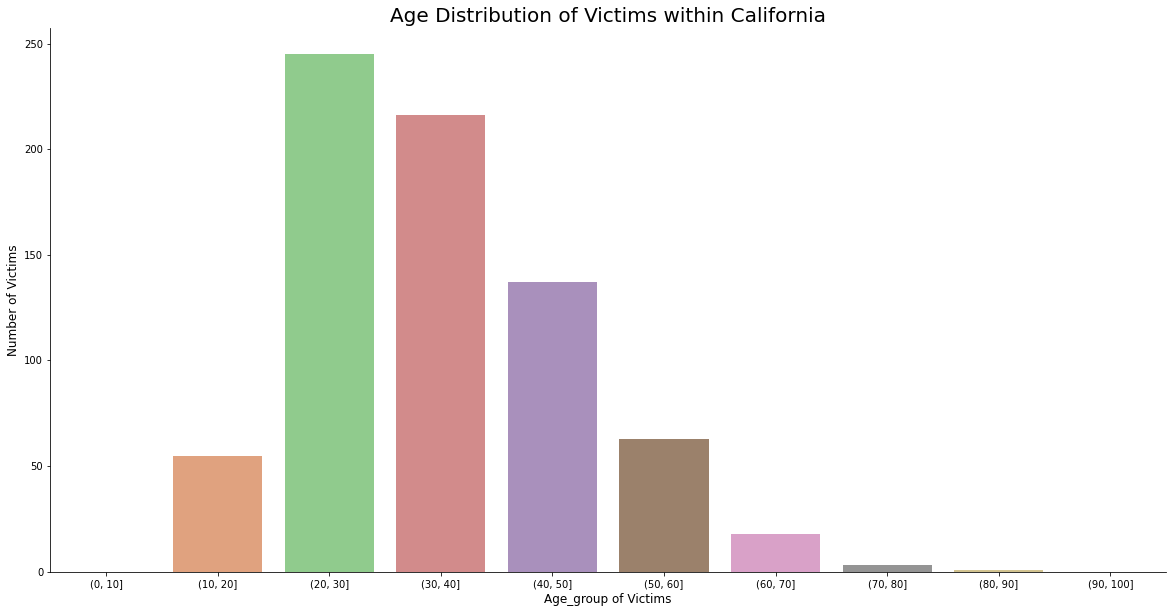

In [44]:
plt.figure(figsize=(20, 10))
sns.countplot(CA['age_group'].dropna(), alpha=0.8, palette='muted')
plt.title('Age Distribution of Victims within California', fontsize=20)
plt.xlabel('Age_group of Victims', fontsize=12)
plt.ylabel('Number of Victims', fontsize=12)
sns.despine();

Within California we observed that majority of the victims belonged to the age groups of (20, 30] and (30, 40]. Thus, we decided to focus on the age group 21 to 40 for our further analysis.

In [45]:
CA_age = CA[(CA['age'] > 20.0)&(CA['age'] <= 40.0)]

**Filtering further based on arms possessed by the victims**

In [46]:
arms = CA_age[CA_age['armed'].notnull()].groupby('armed')['armed'].count().sort_values(ascending=False)
arms.head()

armed
gun             189
knife            98
unarmed          35
toy weapon       26
undetermined     25
Name: armed, dtype: int64

**Visualizing the types of arms and the number of victims who possessed them**

In [47]:
arms = CA_age[CA_age['id'].notnull()].groupby('armed')[[ 'armed']].count()

arms.columns= ['arms_count']
arms.reset_index(inplace = True)
arms.sort_values('arms_count', ascending=False, inplace=True)
arms1 = arms.head()

<Figure size 1440x720 with 0 Axes>

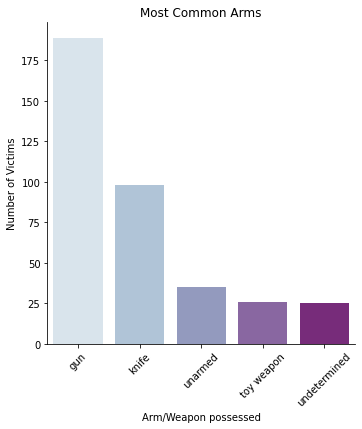

In [48]:
plt.figure(figsize=(20, 10));
sns.catplot(data=arms1, x='armed', y='arms_count', kind='bar', palette='BuPu');
plt.ylabel('Number of Victims')
plt.xlabel('Arm/Weapon possessed');
plt.xticks(rotation=45);
plt.title('Most Common Arms');

Illustrated are the top five most common types of arms. Guns by far are the most common type of arm that contributed to deaths followed next by knife. 

**Since majority of the victims possessed either guns or knives that is what we decided to focus on next.**

In [49]:
CA_age_arm = CA_age[(CA_age['armed'].str.contains('gun') == True) | (CA_age['armed'].str.contains('knife') == True)]

**In consequence to arms possessed by the victims we next looked at the threat_level that these victims appeared to demonstrate**

In [50]:
threat_levels = CA_age_arm[CA_age_arm['threat_level'].notnull()].groupby('threat_level')['threat_level'].count().sort_values(ascending=False)
threat_levels

threat_level
attack          181
other           106
undetermined      6
Name: threat_level, dtype: int64

**Visualisation of the Threat level that the victims appeared to demonstrate**

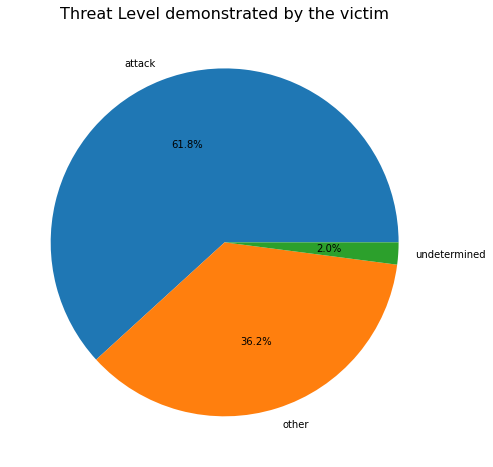

In [51]:
plt.figure(figsize = (8,8))
plt.pie(x=threat_levels, labels = ['attack', 'other','undetermined'],autopct="%.1f%%")
plt.title("Threat Level demonstrated by the victim", fontsize = 16);

**As most of the victims tried to attack, we filter our dataframe for those victims**

In [52]:
CA_age_arm_attack = CA_age_arm[CA_age_arm['threat_level'] == 'attack']

**Analysing the flee method used:**

In [53]:
round((CA_age_arm_attack.groupby('flee')['flee'].count() /  CA_age_arm_attack['flee'].count() * 100),0).sort_values(ascending=False)

flee
Not fleeing    64.0
Car            18.0
Foot           17.0
Other           2.0
Name: flee, dtype: float64

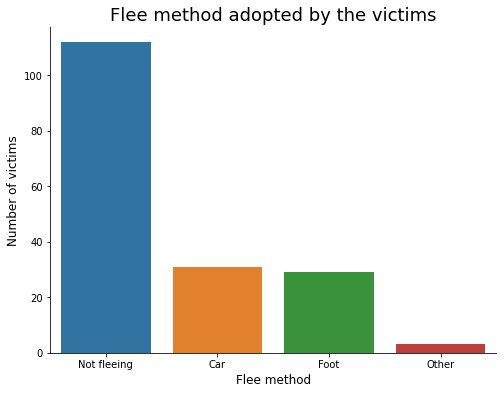

In [54]:
plt.figure(figsize = (8,6))
sns.countplot(x=CA_age_arm_attack['flee'], order=['Not fleeing','Car','Foot','Other'])
sns.despine()
plt.xlabel('Flee method', fontsize=12)
plt.ylabel('Number of victims', fontsize=12)
plt.title('Flee method adopted by the victims', fontsize=18);

We see that majority of the victims (64%) did not try to flee the venue, followed by a trying to flee by Car and on Foot.

**Analysing the Signs of Mental Illness observed in the victims:**

In [55]:
round((CA_age_arm_attack.groupby('signs_of_mental_illness')['signs_of_mental_illness'].count() /  
       CA_age_arm_attack['signs_of_mental_illness'].count() * 100),0).sort_values(ascending=False)

signs_of_mental_illness
False    85.0
True     15.0
Name: signs_of_mental_illness, dtype: float64

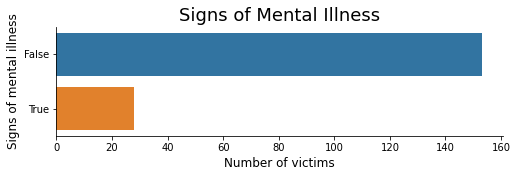

In [56]:
plt.figure(figsize = (8,2))
sns.countplot(y=CA_age_arm_attack['signs_of_mental_illness'])
sns.despine()
plt.ylabel('Signs of mental illness',fontsize=12)
plt.xlabel('Number of victims',fontsize=12)
plt.title('Signs of Mental Illness', fontsize=18);

Around 85% of the victims did not show any signs of mental illness.

# **Storyline Conclusion:**

*   We realized that California had the most deaths by fatal police shootings, so we decided to focus on California
* Next as majority of the victims were in the age group (20, 40] we decided to look further into this group. 
*   Examining the arms, it can be noted that gun was the most common type of arm with 189 deaths in California, and knives were the second most common type of arm with 98 deaths. It can also be noted that there are some uncommon arms which have caused deaths such as the baton, crowbar, and chain which have each contributed to a single death. 
*   Next, we looked at the threat level that these victims demonstrated and found that majority of the victims demonstrated threat_level = attack and thus we decided to look into that group
*   Lastly for the filtered group we had, we looked at the Flee method and observed that majority of the victims (64%) did not flee the site of the incident.
*   We also checked whether the victims in the filtered group showcased any signs of mental illness. We could see that 85% of the victims did not showcase any mental illness signs.




# **Combining with other datasets:** #

**1. Combining it with Population dataset to get state wise density of shootings**
i.e. Number of shootings per million people in the states

* We sourced our population data from the US Census Bureau website: https://www.census.gov/data/datasets/time-series/demo/popest/2010s-state-total.html
* From this dataset we obtained state-wise population for all the 50 states for the year 2019
* This allowed us to easily combine with our dataset of fatal shootings across the states in the year 2019 and compare the density of fatal shootings across different states.

Loading the population dataset

In [57]:
pop = pd.read_csv('Population.csv')
pop.head()

,SUMLEV,REGION,DIVISION,STATE,NAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019,NPOPCHG_2010,NPOPCHG_2011,NPOPCHG_2012,NPOPCHG_2013,NPOPCHG_2014,NPOPCHG_2015,NPOPCHG_2016,NPOPCHG_2017,NPOPCHG_2018,NPOPCHG_2019,BIRTHS2010,BIRTHS2011,BIRTHS2012,BIRTHS2013,BIRTHS2014,BIRTHS2015,BIRTHS2016,BIRTHS2017,BIRTHS2018,BIRTHS2019,DEATHS2010,DEATHS2011,DEATHS2012,...,RDEATH2016,RDEATH2017,RDEATH2018,RDEATH2019,RNATURALINC2011,RNATURALINC2012,RNATURALINC2013,RNATURALINC2014,RNATURALINC2015,RNATURALINC2016,RNATURALINC2017,RNATURALINC2018,RNATURALINC2019,RINTERNATIONALMIG2011,RINTERNATIONALMIG2012,RINTERNATIONALMIG2013,RINTERNATIONALMIG2014,RINTERNATIONALMIG2015,RINTERNATIONALMIG2016,RINTERNATIONALMIG2017,RINTERNATIONALMIG2018,RINTERNATIONALMIG2019,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RDOMESTICMIG2016,RDOMESTICMIG2017,RDOMESTICMIG2018,RDOMESTICMIG2019,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017,RNETMIG2018,RNETMIG2019
0,10,0,0,0,United States,308745538,308758105,309321666,311556874,313830990,315993715,318301008,320635163,322941311,324985539,326687501,328239523,563561,2235208,2274116,2162725,2307293,2334155,2306148,2044228,1701962,1552022,987836,3973485,3936976,3940576,3963195,3992376,3962654,3901982,3824521,3791712,598691,2512442,2501531,...,8.400602,8.606413,8.668095,8.657569,4.706373,4.590575,4.231517,4.353645,4.045944,3.913875,3.438101,3.069450,2.921467,2.493773,2.682083,2.636187,2.921500,3.260435,3.252788,2.871957,2.153911,1.818059,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.493773,2.682083,2.636187,2.921500,3.260435,3.252788,2.871957,2.153911,1.818059
1,20,1,0,0,Northeast Region,55317240,55318443,55380134,55604223,55775216,55901806,56006011,56034684,56042330,56059240,56046620,55982803,61691,224089,170993,126590,104205,28673,7646,16910,-12620,-63817,163466,646249,637860,635751,632433,634504,628030,618490,610713,602740,110878,470811,460915,...,8.574497,8.883355,8.975017,9.025986,3.161491,3.177337,2.789974,2.898189,2.593611,2.632618,2.151103,1.920274,1.734402,3.680555,3.681434,3.428960,3.931182,4.009115,4.177449,3.809171,3.195141,2.394817,-2.792646,-3.719789,-3.898743,-4.917279,-6.071080,-6.667933,-5.646219,-5.329588,-5.254530,0.887909,-0.038355,-0.469783,-0.986097,-2.061965,-2.490484,-1.837048,-2.134447,-2.859713
2,20,2,0,0,Midwest Region,66927001,66929725,66974416,67157800,67336743,67560379,67745167,67860583,67987540,68126781,68236628,68329004,44691,183384,178943,223636,184788,115416,126957,139241,109847,92376,212570,834866,830701,830890,836538,838012,831641,818785,801587,792343,140862,586660,584671,...,9.115871,9.409840,9.209377,9.121680,3.700916,3.658587,3.346624,3.542205,3.125649,3.127816,2.621003,2.547252,2.482162,1.713906,1.767566,1.845688,1.951908,2.070856,2.106735,1.825671,1.380898,1.254708,-2.677835,-2.741509,-1.852612,-2.714878,-3.459293,-3.348519,-2.383041,-2.303653,-2.365881,-0.963930,-0.973943,-0.006924,-0.762969,-1.388437,-1.241784,-0.557370,-0.922755,-1.111173
3,20,3,0,0,South Region,114555744,114563030,114866680,116006522,117241208,118364400,119624037,120997341,122351760,123542189,124569433,125580448,303650,1139842,1234686,1123192,1259637,1373304,1354419,1190429,1027244,1011015,368759,1509634,1504955,1504774,1525313,1545679,1541412,1519344,1494950,1481244,228435,963051,960791,...,8.695993,8.884440,9.003440,8.971661,4.734919,4.665975,4.189603,4.363271,4.101489,3.972326,3.473278,3.047185,2.871191,2.422447,2.898420,2.745376,3.013508,3.507594,3.521386,3.220112,2.415429,1.942372,2.708067,2.952037,2.546697,3.147993,3.769765,3.628688,2.978056,2.810090,3.261349,5.130513,5.850458,5.292073,6.161501,7.277358,7.150074,6.198168,5.225519,5.203720
4,20,4,0,0,West Region,71945553,71946907,72100436,72788329,73477823,74167130,74925793,75742555,76559681,77257329,77834820,78

Extracting the relevant columns from the population dataset

In [58]:
colreq = ['SUMLEV', 'REGION', 'DIVISION', 'STATE', 'NAME', 'CENSUS2010POP', 'ESTIMATESBASE2010',\
          'POPESTIMATE2015', 'POPESTIMATE2016', 'POPESTIMATE2017', 'POPESTIMATE2018', 'POPESTIMATE2019']
pop = pop[colreq]
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   SUMLEV             57 non-null     int64 
 1   REGION             57 non-null     object
 2   DIVISION           57 non-null     object
 3   STATE              57 non-null     int64 
 4   NAME               57 non-null     object
 5   CENSUS2010POP      57 non-null     int64 
 6   ESTIMATESBASE2010  57 non-null     int64 
 7   POPESTIMATE2015    57 non-null     int64 
 8   POPESTIMATE2016    57 non-null     int64 
 9   POPESTIMATE2017    57 non-null     int64 
 10  POPESTIMATE2018    57 non-null     int64 
 11  POPESTIMATE2019    57 non-null     int64 
dtypes: int64(9), object(3)
memory usage: 5.5+ KB


Creating dictionary to map the state abbreviations to their names as in our dataset we have abbreviations only and in the population dataset we have only names

In [59]:
us_state_abbrev = {'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California', 'CO': 'Colorado', 
                   'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho', 
                   'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 
                   'ME': 'Maine', 'MD': 'Maryland', 'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 
                   'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey', 
                   'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma', 
                   'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina', 'SD': 'South Dakota', 
                   'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington', 
                   'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming'}

Checking the number of entries to ensure it is = 50

In [60]:
len(us_state_abbrev)

50

Adding the state name column to our dataset

In [61]:
fpsd_p = fpsd  # Creating a copy of the dataset
fpsd_p['state_name'] = None  # Initialising the column
row = 0
for i in fpsd_p['state']:
  for j in us_state_abbrev:
    if i == j:
      fpsd_p['state_name'][row] =  us_state_abbrev[j]
  row += 1

fpsd_p[['state','state_name']]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,state,state_name
0,WA,Washington
1,OR,Oregon
2,KS,Kansas
3,CA,California
4,CO,Colorado
...,...,...
5411,MO,Missouri
5412,CA,California
5413,KS,Kansas
5414,IL,Illinois


Merging our dataset and the population dataset

In [62]:
fpsd_pop = fpsd_p.merge(pop, left_on = 'state_name', right_on = 'NAME')
fpsd_pop.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,Day of Week,age_group,state_name,SUMLEV,REGION,DIVISION,STATE,NAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Friday,"(50, 60]",Washington,40,4,9,53,Washington,6724540,6724540,7163657,7294771,7423362,7523869,7614893
1,138,Antonio Zambrano-Montes,2015-02-10,shot and Tasered,unarmed,35.0,M,Hispanic,Pasco,WA,True,other,Foot,False,Tuesday,"(30, 40]",Washington,40,4,9,53,Washington,6724540,6724540,7163657,7294771,7423362,7523869,7614893
2,295,Jamison Childress,2015-03-19,shot,unarmed,20.0,M,"White, non-Hispanic",Sumas,WA,True,attack,Not fleeing,False,Thursday,"(10, 20]",Washington,40,4,9,53,Washington,6724540,6724540,7163657,7294771,7423362,7523869,7614893
3,393,Daniel Covarrubias,2015-04-21,shot,unarmed,37.0,M,Native American,Lakewood,WA,True,other,Foot,False,Tuesday,"(30, 40]",Washington,40,4,9,53,Washington,6724540,6724540,7163657,7294771,7423362,7523869,7614893
4,431,Roark Cook,2015-05-04,shot,toy weapon,36.0,M,"White, non-Hispanic",Kennewick,WA,True,attack,Not fleeing,False,Monday,"(30, 40]",Washington,40,4,9,53,Washington,6724540,6724540,7163657,7294771,7423362,7523869,7614893


Extracting the 2019 data

In [63]:
fpsd_pop_2019 = fpsd_pop[fpsd_pop['date'].dt.year == 2019]
fpsd_pop_2019 = fpsd_pop_2019.groupby('state')[['state','POPESTIMATE2019']].agg(['count','mean'])
fpsd_pop_2019.columns = ['count','Population']
fpsd_pop_2019.reset_index(inplace=True)
fpsd_pop_2019['Per_mn'] = fpsd_pop_2019['count'] / fpsd_pop_2019['Population'] * 1000000  # to get per million
v1 = fpsd_pop_2019.sort_values('Per_mn', ascending = False)
v2 = fpsd_pop_2019.sort_values('Population', ascending = False)
v3 = fpsd_pop_2019.sort_values('count', ascending = False)
display('v1', 'v2','v3')

# Observing the top states in terms of Fatal shootings per million (v1); Population per state (v2) and Count of Fatal shootings per state (v3)

,state,count,Population,Per_mn
0,AK,7,731545,9.568789
30,NM,19,2096829,9.061302
34,OK,35,3956971,8.845149
46,WV,13,1792147,7.253869
2,AR,21,3017804,6.958702
5,CO,36,5758736,6.251372
24,MS,18,2976149,6.048084
25,MT,6,1068778,5.613888
10,HI,7,1415872,4.943950
39,TN,33,6829174,4.832210


Visualising the fatal shootings density

In [64]:
fpsd_pop_2019.sort_values('Per_mn', inplace=True, ascending = False)
fig = px.choropleth(fpsd_pop_2019, locations=fpsd_pop_2019['state'], \
                    color=fpsd_pop_2019['Per_mn'],locationmode="USA-states", title='Density of fatal shootings',  \
                    width=1000, color_continuous_scale = 'Blues',scope="usa", labels={'Per_mn': 'No. of Victims per million'})
fig.show()

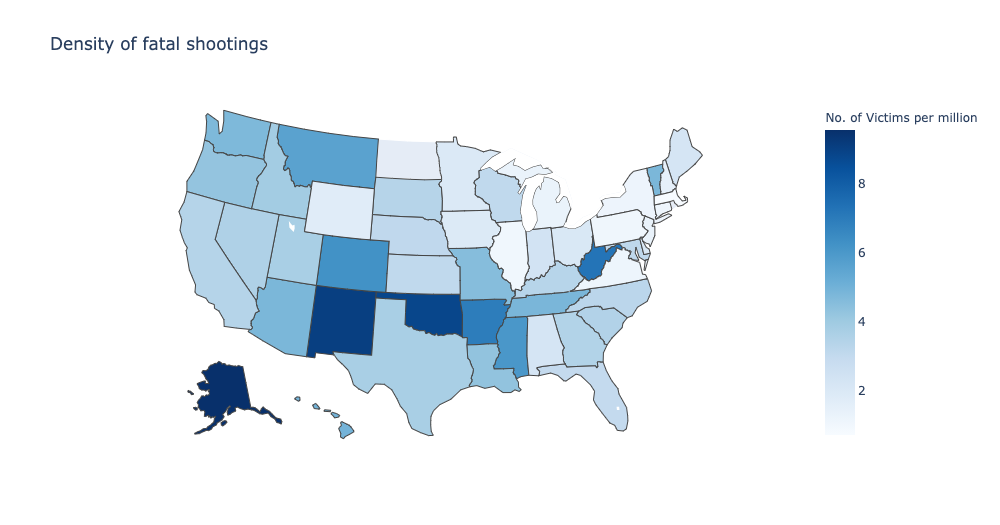

In [65]:
# Re-adding the above graph as an image in case it is not rendering on a different platform
from IPython.display import Image
Image(filename='Percent_heatmap.png')

**Conclusion:**

*   When we examine states of comparable population we can see the differences in the shootings density based on the location. for e.g. California has the highest number of deaths immediately followed by Texas, but if we look at the density, we can see that Texas had a higher percentage of fatal shootings. Adding the population dataset helped us in getting this clarification.
*   We observe that Alaska has the highest shootings density followed by New Mexico and Oklahoma.



**2. Combining it with Racial Population dataset to get race wise density of shootings**
i.e. Number of shootings per million people of that race

* We sourced this dataset from Bigquery
* From the dataset we were able to get the population of each race (2018 data) which we used to get the density for fatal shootings for each race

In [66]:
# Loading the race dataset taken from BigQuery
race_data = pd.read_csv('BQ_state_2018_1yr.csv')
print(f'Shape: {race_data.shape}')
race_data.head()

Shape: (52, 252)


,geo_id,nonfamily_households,family_households,median_year_structure_built,rent_burden_not_computed,rent_over_50_percent,rent_40_to_50_percent,rent_35_to_40_percent,rent_30_to_35_percent,rent_25_to_30_percent,rent_20_to_25_percent,rent_15_to_20_percent,rent_10_to_15_percent,rent_under_10_percent,total_pop,male_pop,female_pop,median_age,white_pop,black_pop,asian_pop,hispanic_pop,amerindian_pop,other_race_pop,two_or_more_races_pop,not_hispanic_pop,commuters_by_public_transportation,households,median_income,income_per_capita,housing_units,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,median_rent,percent_income_spent_on_rent,owner_occupied_housing_units,million_dollar_housing_units,mortgaged_housing_units,families_with_young_children,...,occupation_natural_resources_construction_maintenance,occupation_production_transportation_material,occupation_sales_office,occupation_services,one_car,two_cars,three_cars,pop_25_64,pop_determined_poverty_status,population_1_year_and_over,population_3_years_over,poverty,sales_office_employed,some_college_and_associates_degree,walked_to_work,worked_at_home,workers_16_and_over,associates_degree,bachelors_degree,high_school_diploma,less_one_year_college,masters_degree,one_year_more_college,pop_25_years_over,commute_35_44_mins,commute_60_more_mins,commute_less_10_mins,commuters_16_over,hispanic_any_race,pop_5_years_over,speak_only_english_at_home,speak_spanish_at_home,speak_spanish_at_home_low_english,pop_15_and_over,pop_never_married,pop_now_married,pop_separated,pop_widowed,pop_divorced,do_date
0,15,138460,316849,1979,15878,47549,18124,10608,15862,19698,21043,20103,13124,7956,1420491,710702,709789,39.3,308375,26978,521237,151356,1976,1321,274372,1269135,40582,455309,80212,35255,546261,90952,21097,4707,1475,31.6,265364,29411,170872,97334,...,63152,70078,150740,166631,150118,161272,62561,734122,1382448,1403653.0,1370130,122143,150740,315209.0,25879,37933,707479,110557,218828,244008,58960,79475,145692,995589,47874,65652,72831,669546,151356.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
1,72,388283,791354,1978,178625,63579,20442,12875,18473,22014,23545,21476,18263,6554,3195153,1520415,1674738,42.9,30793,4372,1747,3154017,0,3077,1147,41136,17251,1179637,20296,12805,1553061,373424,27739,21934,378,33.2,793791,2331,302284,149861,...,93191,115460,254856,217571,495951,347342,112830,1626814,3165711,NaN,3122920,1363666,254856,NaN,20540,22390,980796,241678,430692,593674,35044,120713,240998,2288030,75602,132165,73536,958406,3154017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
2,2,87024,167527,1984,8470,15113,6184,4172,8608,10588,10980,10769,7748,4811,737438,382952,354486,34.9,443304,24011,45513,53069,107887,895,54882,684369,4382,254551,74346,35735,318352,63801,8371,3525,1077,27.4,167108,757,102706,60207,...,39585,42810,69643,63120,77775,92320,43035,397353,720869,727164.0,708414,78620,69643,169188.0,27597,18738,355403,39938,89635,111553,37391,38582,91859,485353,6376,16322,87738,336665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
3,30,165778,265643,1978,14710,29277,9313,7140,10076,13463,17486,17040,13378,8520,1062305,534782,527523,40.1,912200,4899,8474,41605,65452,980,27766,1020700,3876,431421,55328,30680,515161,83740,11445,3895,707,27.4,291018,3900,164197,70728,...,60251,56429,112707,102145,114227,161966,84224,535522,1037462,1051757.0,1028186,135114,112707,251781.0,28187,37575,514776,71397,152448,170480,56499,57723,123885,735761,11260,21265,127227,477201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
4,28,380682,727948,1984,52023,76435,26639,21747,25500,33275,37713,38747,25998,14358,2986530,1446829,1539701,37.7,1684276,1130353,25819,87126,12675,4320,40782,2899404,3048,1108630,44717,24160,1332631,224001,41723,17818,591,30.0,756195,3036,365204,203783,...,125562,227196,254230,224904,367794,405441,176011,1502860,2886448,2955717.0,2885964,567645,254230,640631.0,16692,32097,1217480,200375,284701,475011,128440,122992,311816,1977283,63582,82319,160753,1185383,87126.0,NaN,NaN,NaN,

In [67]:
# Loading fips code data (taken from BigQuery) to enable linking our dataset that has state abbreviations and the race data that has geo_id (or fips id) 
fips_code = pd.read_csv('BQ_fips_codes_states.csv')
print(f'Shape: {fips_code.shape}')
fips_code.head()

Shape: (57, 4)


,state_fips_code,state_postal_abbreviation,state_name,state_gnisid
0,1,AL,Alabama,1779775
1,2,AK,Alaska,1785533
2,4,AZ,Arizona,1779777
3,5,AR,Arkansas,68085
4,6,CA,California,1779778


In [68]:
# Combining the fips code and race data to get the state abbrevaitions in the race dataset
fips_race = fips_code.merge(race_data, how='inner', left_on='state_fips_code', right_on='geo_id')
print(fips_race.shape)
fips_race.head()

(52, 256)


,state_fips_code,state_postal_abbreviation,state_name,state_gnisid,geo_id,nonfamily_households,family_households,median_year_structure_built,rent_burden_not_computed,rent_over_50_percent,rent_40_to_50_percent,rent_35_to_40_percent,rent_30_to_35_percent,rent_25_to_30_percent,rent_20_to_25_percent,rent_15_to_20_percent,rent_10_to_15_percent,rent_under_10_percent,total_pop,male_pop,female_pop,median_age,white_pop,black_pop,asian_pop,hispanic_pop,amerindian_pop,other_race_pop,two_or_more_races_pop,not_hispanic_pop,commuters_by_public_transportation,households,median_income,income_per_capita,housing_units,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,median_rent,percent_income_spent_on_rent,...,occupation_natural_resources_construction_maintenance,occupation_production_transportation_material,occupation_sales_office,occupation_services,one_car,two_cars,three_cars,pop_25_64,pop_determined_poverty_status,population_1_year_and_over,population_3_years_over,poverty,sales_office_employed,some_college_and_associates_degree,walked_to_work,worked_at_home,workers_16_and_over,associates_degree,bachelors_degree,high_school_diploma,less_one_year_college,masters_degree,one_year_more_college,pop_25_years_over,commute_35_44_mins,commute_60_more_mins,commute_less_10_mins,commuters_16_over,hispanic_any_race,pop_5_years_over,speak_only_english_at_home,speak_spanish_at_home,speak_spanish_at_home_low_english,pop_15_and_over,pop_never_married,pop_now_married,pop_separated,pop_widowed,pop_divorced,do_date
0,1,AL,Alabama,1779775,1,640390,1214794,1984,83848,124235,43018,30309,46340,60512,57428,66867,54722,25648,4887871,2369271,2518600,39.3,3192169,1298603,64942,211485,20450,6970,91455,4676386,6983,1855184,49861,27525,2274711,419527,68102,23952,585,29.1,...,204962,367633,448626,335896,588276,671415,317926,2507801,4763828,4832358.0,4719009,800422,448626,1010272.0,22416,71400,2068020,288285,536086,848061,201877,229484,520110,3337464,126460,133148,239412,1996620,211485.0,4599282.0,4355425.0,150932.0,62193.0,NaN,NaN,NaN,NaN,NaN,NaN,2018
1,2,AK,Alaska,1785533,2,87024,167527,1984,8470,15113,6184,4172,8608,10588,10980,10769,7748,4811,737438,382952,354486,34.9,443304,24011,45513,53069,107887,895,54882,684369,4382,254551,74346,35735,318352,63801,8371,3525,1077,27.4,...,39585,42810,69643,63120,77775,92320,43035,397353,720869,727164.0,708414,78620,69643,169188.0,27597,18738,355403,39938,89635,111553,37391,38582,91859,485353,6376,16322,87738,336665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
2,4,AZ,Arizona,1779777,4,901292,1713006,1990,60746,189585,77613,55618,81974,107029,118982,117854,74383,36147,7171646,3565129,3606517,38.0,3894250,310388,232105,2266342,277800,9960,166624,4905304,53718,2614298,59246,30530,3035902,421604,56431,29935,884,28.8,...,289566,359444,749962,637870,914845,986809,374114,3581201,7013444,7090137.0,6915138,983499,749962,1636580.0,55276,214693,3174586,428422,898032,970146,360418,389350,847740,4840304,226806,212333,358254,2959893,2266342.0,6737614.0,4882267.0,1395115.0,451680.0,NaN,NaN,NaN,NaN,NaN,NaN,2018
3,5,AR,Arkansas,68085,5,387213,769134,1984,41639,78211,29408,23438,31329,42490,44704,48861,39662,16204,3013825,1476680,1537145,38.1,2174167,454521,46681,230300,17615,4612,76651,2783525,5009,1156347,47062,26626,1380521,224174,36912,16436,559,28.3,...,130516,238663,281588,222937,370301,442731,188112,1514263,2925448,2975961.0,2901703,504504,281588,604811.0,20052,48766,1301150,154143,296422,570551,133319,125495,317349,2021939,63801,60908,222950,1252384,230300.0,2825733.0,2609015.0,154946.0,66061.0,NaN,NaN,NaN,NaN,NaN,NaN,2018
4,6,CA,California,1779778,6,4137501,8934621,1975,291241,1573818,574884,399194,517772,645007,688984,618182,413162,184214,39557045,19673553,19883492,36.7,14495479,2179078,5741886,15540142,139116,100696,1217346,24016903,914825,13072122,75277,37124,14277867,1205745,246826,88682,1399,32.5,...,1711879,2324103,3965290,3514097,3949527,4823991,2160814,21148307,38818454,39114889.0,38151126,4969326,3

In [69]:
# Renaming race columns to match with our dataset
fips_race.rename(inplace=True, columns={'white_pop': 'White, non-Hispanic',\
                                        'black_pop': 'Black, non-Hispanic',\
                                        'asian_pop': 'Asian',\
                                        'hispanic_pop': 'Hispanic',\
                                        'amerindian_pop': 'Native American',\
                                        'other_race_pop': 'Other'})
print(fips_race.shape)
fips_race.head()

(52, 256)


,state_fips_code,state_postal_abbreviation,state_name,state_gnisid,geo_id,nonfamily_households,family_households,median_year_structure_built,rent_burden_not_computed,rent_over_50_percent,rent_40_to_50_percent,rent_35_to_40_percent,rent_30_to_35_percent,rent_25_to_30_percent,rent_20_to_25_percent,rent_15_to_20_percent,rent_10_to_15_percent,rent_under_10_percent,total_pop,male_pop,female_pop,median_age,"White, non-Hispanic","Black, non-Hispanic",Asian,Hispanic,Native American,Other,two_or_more_races_pop,not_hispanic_pop,commuters_by_public_transportation,households,median_income,income_per_capita,housing_units,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,median_rent,percent_income_spent_on_rent,...,occupation_natural_resources_construction_maintenance,occupation_production_transportation_material,occupation_sales_office,occupation_services,one_car,two_cars,three_cars,pop_25_64,pop_determined_poverty_status,population_1_year_and_over,population_3_years_over,poverty,sales_office_employed,some_college_and_associates_degree,walked_to_work,worked_at_home,workers_16_and_over,associates_degree,bachelors_degree,high_school_diploma,less_one_year_college,masters_degree,one_year_more_college,pop_25_years_over,commute_35_44_mins,commute_60_more_mins,commute_less_10_mins,commuters_16_over,hispanic_any_race,pop_5_years_over,speak_only_english_at_home,speak_spanish_at_home,speak_spanish_at_home_low_english,pop_15_and_over,pop_never_married,pop_now_married,pop_separated,pop_widowed,pop_divorced,do_date
0,1,AL,Alabama,1779775,1,640390,1214794,1984,83848,124235,43018,30309,46340,60512,57428,66867,54722,25648,4887871,2369271,2518600,39.3,3192169,1298603,64942,211485,20450,6970,91455,4676386,6983,1855184,49861,27525,2274711,419527,68102,23952,585,29.1,...,204962,367633,448626,335896,588276,671415,317926,2507801,4763828,4832358.0,4719009,800422,448626,1010272.0,22416,71400,2068020,288285,536086,848061,201877,229484,520110,3337464,126460,133148,239412,1996620,211485.0,4599282.0,4355425.0,150932.0,62193.0,NaN,NaN,NaN,NaN,NaN,NaN,2018
1,2,AK,Alaska,1785533,2,87024,167527,1984,8470,15113,6184,4172,8608,10588,10980,10769,7748,4811,737438,382952,354486,34.9,443304,24011,45513,53069,107887,895,54882,684369,4382,254551,74346,35735,318352,63801,8371,3525,1077,27.4,...,39585,42810,69643,63120,77775,92320,43035,397353,720869,727164.0,708414,78620,69643,169188.0,27597,18738,355403,39938,89635,111553,37391,38582,91859,485353,6376,16322,87738,336665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
2,4,AZ,Arizona,1779777,4,901292,1713006,1990,60746,189585,77613,55618,81974,107029,118982,117854,74383,36147,7171646,3565129,3606517,38.0,3894250,310388,232105,2266342,277800,9960,166624,4905304,53718,2614298,59246,30530,3035902,421604,56431,29935,884,28.8,...,289566,359444,749962,637870,914845,986809,374114,3581201,7013444,7090137.0,6915138,983499,749962,1636580.0,55276,214693,3174586,428422,898032,970146,360418,389350,847740,4840304,226806,212333,358254,2959893,2266342.0,6737614.0,4882267.0,1395115.0,451680.0,NaN,NaN,NaN,NaN,NaN,NaN,2018
3,5,AR,Arkansas,68085,5,387213,769134,1984,41639,78211,29408,23438,31329,42490,44704,48861,39662,16204,3013825,1476680,1537145,38.1,2174167,454521,46681,230300,17615,4612,76651,2783525,5009,1156347,47062,26626,1380521,224174,36912,16436,559,28.3,...,130516,238663,281588,222937,370301,442731,188112,1514263,2925448,2975961.0,2901703,504504,281588,604811.0,20052,48766,1301150,154143,296422,570551,133319,125495,317349,2021939,63801,60908,222950,1252384,230300.0,2825733.0,2609015.0,154946.0,66061.0,NaN,NaN,NaN,NaN,NaN,NaN,2018
4,6,CA,California,1779778,6,4137501,8934621,1975,291241,1573818,574884,399194,517772,645007,688984,618182,413162,184214,39557045,19673553,19883492,36.7,14495479,2179078,5741886,15540142,139116,100696,1217346,24016903,914825,13072122,75277,37124,14277867,1205745,246826,88682,1399,32.5,...,1711879,2324103,3965290,3514097,3949527,4823991,2160814,21148307,38818454,39114889.0,38151126,4

In [70]:
# Getting race wise number for deaths due to police shootings from our dataset
fpsd_race = fpsd.groupby('race')[['race']].count().rename(columns={'race':'count'}).reset_index().sort_values('race')
fpsd_race

,race,count
0,Asian,93
1,"Black, non-Hispanic",1298
2,Hispanic,902
3,Native American,78
4,Other,48
5,"White, non-Hispanic",2476


In [71]:
# Getting total population for each race from the race dataset
race_data_extract = fips_race[['White, non-Hispanic', 'Black, non-Hispanic', 'Asian', 'Hispanic',
       'Native American', 'Other']].sum().to_frame().reset_index()
race_data_extract.columns = ['race', 'population']
race_data_extract

,race,population
0,"White, non-Hispanic",197064732
1,"Black, non-Hispanic",40310242
2,Asian,18195260
3,Hispanic,62917648
4,Native American,2180266
5,Other,829184


In [72]:
fpsd_race_data_extract = fpsd_race.merge(race_data_extract, on='race')
fpsd_race_data_extract['victims per million'] = np.ceil(fpsd_race_data_extract['count']*1000000 / fpsd_race_data_extract['population'])
fpsd_race_data_extract['victims per million'] = fpsd_race_data_extract['victims per million'].astype('int64')
fpsd_race_data_extract.sort_values('count', inplace=True, ascending=False)
fpsd_race_data_extract

,race,count,population,victims per million
5,"White, non-Hispanic",2476,197064732,13
1,"Black, non-Hispanic",1298,40310242,33
2,Hispanic,902,62917648,15
0,Asian,93,18195260,6
3,Native American,78,2180266,36
4,Other,48,829184,58


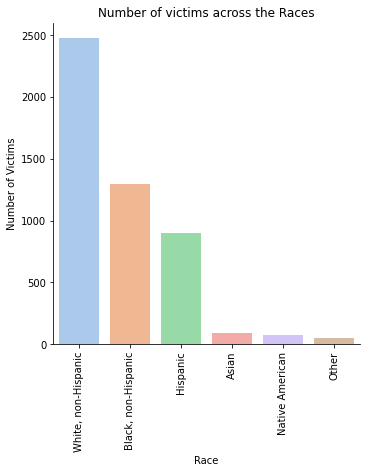

In [73]:
# Plotting the counts for each race
sns.catplot(data=fpsd_race_data_extract, x='race', y='count', kind='bar', palette='pastel', aspect=1, height=5)
plt.ylabel('Number of Victims')
plt.xlabel('Race');
plt.xticks(rotation=90)
plt.title('Number of victims across the Races');

In [74]:
# The smaller categories like Other, Asian and Native Americans are adding biased densities to the dataset, 
# for impactful visualisation, we exclude them from further analysis
fpsd_race_data_extract = fpsd_race_data_extract[0:3]

fig = px.scatter(fpsd_race_data_extract, x="race", y='population',
	         size="victims per million", text="victims per million",
                 hover_name="race", size_max=100)
fig.update_layout(width=800,height=600, title_text='Number of victims per million race-population', xaxis_title="Race", yaxis_title="Population", showlegend=True)
fig.update_traces(textfont_size=14)
fig.show()

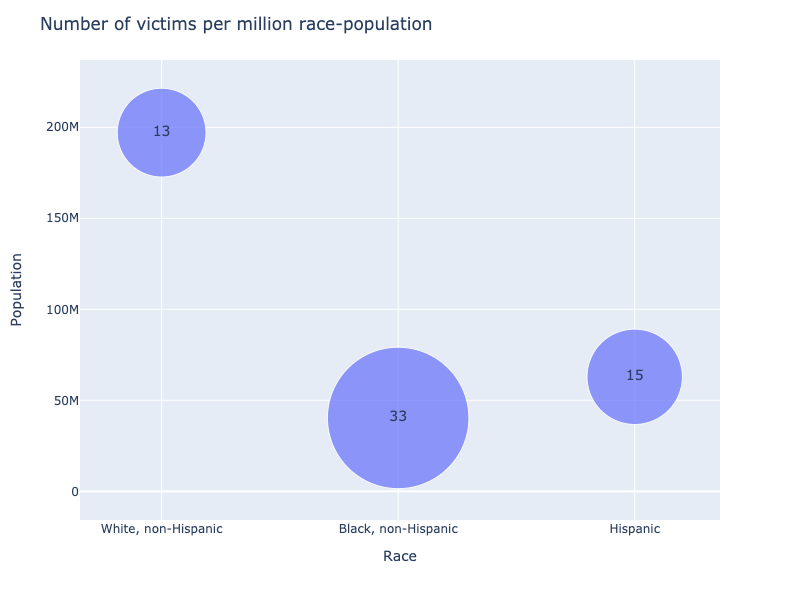

In [108]:
# Re-adding the above graph as an image in case it is not rendering on a different platform
from IPython.display import Image
Image(filename='Race_density.png')

Conclusion:
It is evidently visible that the numbers of Black and Hispanic people per million population (of that race) shot fatally by police is higher than that for white race. The nummber fo Black victims per million Black population is more than twice that of White victims per million White population.

In [75]:
# Now looking at the data statewise
# We will group the fatal shootings for each state and for each race
fpsd_pr = fpsd.copy()
fpsd_pr['race'] = fpsd_pr['race'].astype('object')
fpsd_pr['race'].dropna(inplace = True)
fpsd_pr_2018 = fpsd_pr[fpsd_pr['date'].dt.year == 2018]
fpsd_pr_2018_g = fpsd_pr_2018.groupby(['state','race'])[['state']].count()
fpsd_pr_2018_g.columns = ['count']
fpsd_pr_2018_g.reset_index(inplace=True)

# Now we add the population for that state and race from the population dataset
fpsd_pr_2018_g['pop'] = None
for i in fpsd_pr_2018_g.index:
  s = fpsd_pr_2018_g.loc[i, 'state']
  r = fpsd_pr_2018_g.loc[i, 'race']
  p = int(fips_race[r][fips_race['state_postal_abbreviation'] == s].values)
  fpsd_pr_2018_g['pop'][i] = p

# Now calculating the density of the fatal shootings
fpsd_pr_2018_g['Percent'] = fpsd_pr_2018_g['count'] / fpsd_pr_2018_g['pop'] * 1000000
fpsd_pr_2018_g['Percent'] = fpsd_pr_2018_g['Percent'].astype('float64')
fpsd_pr_2018_g.head(7)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,state,race,count,pop,Percent
0,AK,Asian,1,45513,21.971744
1,AK,"Black, non-Hispanic",1,24011,41.647578
2,AK,Native American,2,107887,18.537915
3,AK,"White, non-Hispanic",3,443304,6.767365
4,AL,"Black, non-Hispanic",3,1298603,2.310175
5,AL,"White, non-Hispanic",9,3192169,2.819400
6,AR,"Black, non-Hispanic",8,454521,17.600947


# Applying Machine Learning to the dataset

Importing relevant libraries

In [76]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso

Reloading the dataset

In [77]:
fpsd_ml = pd.read_csv('fatal-police-shootings-data.csv')
print(fpsd_ml.shape)
fpsd_ml.info()

(5416, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5416 entries, 0 to 5415
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       5416 non-null   int64  
 1   name                     5416 non-null   object 
 2   date                     5416 non-null   object 
 3   manner_of_death          5416 non-null   object 
 4   armed                    5189 non-null   object 
 5   age                      5181 non-null   float64
 6   gender                   5414 non-null   object 
 7   race                     4895 non-null   object 
 8   city                     5416 non-null   object 
 9   state                    5416 non-null   object 
 10  signs_of_mental_illness  5416 non-null   bool   
 11  threat_level             5416 non-null   object 
 12  flee                     5167 non-null   object 
 13  body_camera              5416 non-null   bool   
dtypes: bool(2), f

Treating null values

In [78]:
fpsd_ml.isnull().sum()

id                           0
name                         0
date                         0
manner_of_death              0
armed                      227
age                        235
gender                       2
race                       521
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                       249
body_camera                  0
dtype: int64

Imputing Race column with 'unknown'

In [79]:
fpsd_ml['race'].fillna('unknown', inplace = True)

We replaced the null values in the race column as a new value called 'unknown' since the races in the value 'other' meant neither of the choices we already had were an option and we did not want to bias the dataset.

Imputing null values in Flee column with most frequent entry

In [80]:
most_freq_F = fpsd_ml.groupby('flee')['flee'].count().sort_values(ascending=False).index[0]
fpsd_ml['flee'].fillna(most_freq_F, inplace=True)

Imputing null values in Armed column with most frequent entry

In [81]:
most_freq_A = fpsd_ml.groupby('armed')['armed'].count().sort_values(ascending=False).index[0]
fpsd_ml['armed'].fillna(most_freq_A, inplace=True)

Imputing null values in Gender column with most frequent entry

In [82]:
most_freq_G = fpsd_ml.groupby('gender')['gender'].count().sort_values(ascending=False).index[0]
fpsd_ml['gender'].fillna(most_freq_G, inplace=True)
fpsd_ml['gender'].unique()

array(['M', 'F'], dtype=object)

Imputing null values in Age column with mean

In [83]:
fpsd_ml['age'].fillna(round(fpsd_ml['age'].mean(),0), inplace=True)

Checking for null values again

In [84]:
fpsd_ml.isnull().sum()

id                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
dtype: int64

Armed column contained many categories - thus we kept top three categories (gun, knife, unarmed) and converted rest to ‘other’

In [85]:
fpsd_arm = fpsd_ml['armed'].groupby(fpsd_ml['armed']).count().sort_values(ascending = False).to_frame()
fpsd_arm.columns = ['count']
fpsd_arm.reset_index(inplace=True)
fpsd_arm.loc[3:, 'armed'] = 'other'
fpsd_arm = fpsd_arm.groupby('armed')['count'].sum().sort_values(ascending = False)
fpsd_ml.loc[fpsd_ml['armed'].isin(['gun', 'knife', 'unarmed']) == False,'armed'] = 'other'
fpsd_ml['armed']

0           gun
1           gun
2       unarmed
3         other
4         other
         ...   
5411        gun
5412      other
5413        gun
5414        gun
5415        gun
Name: armed, Length: 5416, dtype: object

Removing irrelevant columns and Getting dummy columns

In [86]:
fpsd_ml.drop(['id', 'name', 'date', 'city', 'state'], axis=1, inplace=True)
fpsd_ml_dum = pd.get_dummies(fpsd_ml, columns=['manner_of_death', 'armed', 'gender',
       'race', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'], drop_first = True)
fpsd_ml_dum.head()

,age,manner_of_death_shot and Tasered,armed_knife,armed_other,armed_unarmed,gender_M,race_B,race_H,race_N,race_O,race_W,race_unknown,signs_of_mental_illness_True,threat_level_other,threat_level_undetermined,flee_Foot,flee_Not fleeing,flee_Other,body_camera_True
0,53.0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
1,47.0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
2,23.0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0
3,32.0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0
4,39.0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0


In [87]:
fpsd_ml_dum.shape

(5416, 19)

### Trying to predict whether the victim showcased any **Signs of Mental Illness** at the time of the incident

In [88]:
# Setting datasets and fitting LogisticRegression model
X = fpsd_ml_dum.drop('signs_of_mental_illness_True', axis= 1)
                                                                    
y = fpsd_ml_dum['signs_of_mental_illness_True']
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=.3, random_state = 833)
model = LogisticRegression(solver = 'liblinear')

model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

# Checking the performance metrics of the above model
print('Logistic Regression method \n')
print(metrics.classification_report(ytest, y_model, zero_division=1, digits=4))

Logistic Regression method 

              precision    recall  f1-score   support

           0     0.7863    0.9929    0.8776      1271
           1     0.5500    0.0311    0.0588       354

    accuracy                         0.7834      1625
   macro avg     0.6681    0.5120    0.4682      1625
weighted avg     0.7348    0.7834    0.6992      1625



In [89]:
# Trying the Gaussian Naive Bayes method
modelGaus = GaussianNB()
modelGaus.fit(Xtrain, ytrain)
y_model = modelGaus.predict(Xtest)

# Checking the performance metrics of the above model
print('Gaussian Naive Bayes method \n')
print(metrics.classification_report(ytest, y_model, zero_division=1, digits=4))

Gaussian Naive Bayes method 

              precision    recall  f1-score   support

           0     0.8724    0.6672    0.7561      1271
           1     0.3522    0.6497    0.4568       354

    accuracy                         0.6634      1625
   macro avg     0.6123    0.6585    0.6065      1625
weighted avg     0.7591    0.6634    0.6909      1625



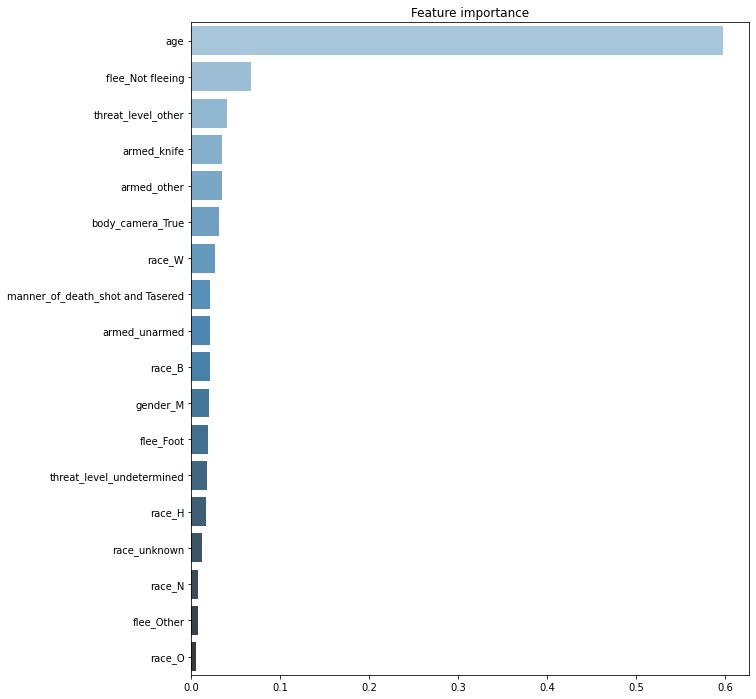

In [90]:
# Checking Feature importance
params = {'random_state': 0, 'n_jobs': 4, 'n_estimators': 1000, 'max_depth': None, 'class_weight': 'balanced'}

# Fit RandomForest Classifier
clf = RandomForestClassifier(**params)
clf = clf.fit(Xtrain, ytrain)

# Plot features importances
imp = pd.Series(data=clf.feature_importances_, index=Xtrain.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="Blues_d", orient='h')

In [91]:
# Dropping  race, as it is potentially an unimportant feature and Trying the Logistic Regression method
X = fpsd_ml_dum.drop(['signs_of_mental_illness_True', 'race_B'	, 'race_H',	'race_N' , 'race_O',	'race_W',	'race_unknown' ], axis=1)
y = fpsd_ml_dum['signs_of_mental_illness_True']
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=.3, random_state = 833)
model = LogisticRegression(solver = 'liblinear')

model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

#Checking performance metrics
print('Logistic Regression method\n')
print(metrics.classification_report(ytest, y_model, zero_division=1, digits=4))

Logistic Regression method

              precision    recall  f1-score   support

           0     0.7835    0.9992    0.8783      1271
           1     0.7500    0.0085    0.0168       354

    accuracy                         0.7834      1625
   macro avg     0.7667    0.5038    0.4475      1625
weighted avg     0.7762    0.7834    0.6906      1625



In [92]:
# Dropping  race, as it is potentially an unimportant feature and Trying the Gaussian Naive Bayes method
modelGausFeat = GaussianNB()
modelGausFeat.fit(Xtrain, ytrain)
y_model = modelGausFeat.predict(Xtest)

# Checking the performance metrics
print('Gaussian Naive Bayes method\n')
print(metrics.classification_report(ytest, y_model, zero_division=1, digits=4))

Gaussian Naive Bayes method

              precision    recall  f1-score   support

           0     0.8310    0.7773    0.8033      1271
           1     0.3509    0.4322    0.3873       354

    accuracy                         0.7022      1625
   macro avg     0.5909    0.6048    0.5953      1625
weighted avg     0.7264    0.7022    0.7126      1625



Conclusion for Signs of Mental Illness model:

*   With the Logistic Regression model, imbalances in the data are evident in the recall section. Recall of 0 is .9929 and recall of 1 is .0311. 
*   Gaussian Naive bayes model seems to smooth out these imbalances present in the Logistic Regression model. Recall 0 is .6672 and recall of 1 is .6497. '
*   Since the data is imbalanced, f1 score is examined rather than the accuracy score. Overall it seems that the Gaussian Naive Bayes model is better as it takes on an f1 macro score of .6065 and an f1-weighted score of .6909 compared to the Logistic regression model which has a much lower macro f1 score of .4682 and only a marginally higher f1 weighted score of .6992. 
*   When conducting feature engineering, race was removed as this is what ranked low on the feature importance graph.  In the logistic regression model, the imbalances in recall remained apparent and the imbalance actually increased marginally - recall 0 was .9992 and recall of 1 was .0085. Observing the f1-scores, Logistic Regression model had a lower score than the Guassian Naive Bayes model hence the Naive Bayes model is better. 
*   Finally, we can see that before and feature engineering, the Gaussian Naive Bayes model was the better model. However, between the two Naive Bayes models (before and after feature engineering), it is hard to say which one is the better one and whether the removal of Race made any difference.

**Other ML models that were tried but were not very accurate/effective in predicting the y variable**

### Trying to predict the **Race** of the victim

In [93]:
# Setting the data and fitting models
fpsd_ml_race = fpsd_ml
fpsd_ml_race_dum = pd.get_dummies(fpsd_ml_race, columns=['manner_of_death', 'armed', 'gender',
       'flee', 'signs_of_mental_illness', 'threat_level', 'body_camera'], drop_first = True)
print(f'Shape: {fpsd_ml_race_dum.shape}')

le = preprocessing.LabelEncoder()
X = fpsd_ml_race_dum.drop(['race'], axis=1)
y = le.fit_transform(fpsd_ml_race_dum["race"])

# Logistic Regression Model
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=833)
model = LogisticRegression(solver='liblinear')                    
model.fit(Xtrain, ytrain)  
ymodel = model.predict(Xtest) 
print('Logistic Regression method \n')
print(f'labels: {list(le.classes_)} and codes: {list(range(0,len(list(le.classes_))))}\n')
print(metrics.classification_report(ytest, ymodel))

# Gaussian Naive Bayes Model
model = GaussianNB()
model.fit(Xtrain, ytrain)
ymodel = model.predict(Xtest)
print('Gaussian Naive Bayes method \n')
print(f'labels: {list(le.classes_)} and codes: {list(range(0,len(list(le.classes_))))}\n')
print(metrics.classification_report(ytest, ymodel, zero_division=1))

Shape: (5416, 14)
Logistic Regression method 

labels: ['A', 'B', 'H', 'N', 'O', 'W', 'unknown'] and codes: [0, 1, 2, 3, 4, 5, 6]

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.42      0.30      0.35       383
           2       0.00      0.00      0.00       280
           3       0.00      0.00      0.00        18
           4       0.00      0.00      0.00        12
           5       0.51      0.90      0.65       759
           6       0.00      0.00      0.00       146

    accuracy                           0.49      1625
   macro avg       0.13      0.17      0.14      1625
weighted avg       0.34      0.49      0.39      1625

Gaussian Naive Bayes method 

labels: ['A', 'B', 'H', 'N', 'O', 'W', 'unknown'] and codes: [0, 1, 2, 3, 4, 5, 6]

              precision    recall  f1-score   support

           0       0.02      0.96      0.03        27
           1       0.33      0.01      0.02      

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



For the model trained to predict race, we tried two different models: the Logistic and the Gaussian Naive Bayes models. We got an accuracy of 49% in the Logistic model and of 3% for the Gaussian Model. Thus, we decided to group the Asians, Hispanics, Native Americans, unknown, and other races in an 'All Others' category since they had the lowest precision to try and have a better accuracy using the same models.

In [94]:
#Change of variables: We only kept the three more frequent races to see if that would impact the accuracy
fpsd_ml_race_dum['race'].replace(['A', 'H', 'N', 'unknown', 'O'], 'All Others', inplace = True) 

le = preprocessing.LabelEncoder()
X = fpsd_ml_race_dum.drop(['race'], axis=1)
y = le.fit_transform(fpsd_ml_race_dum["race"])

#Logistic Regression Model
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=833)
model = LogisticRegression(solver='liblinear')                    
model.fit(Xtrain, ytrain)  
ymodel = model.predict(Xtest) 
print('Logistic Regression method \n')
print(f'labels: {list(le.classes_)} and codes: {list(range(0,len(list(le.classes_))))}\n')
print(metrics.classification_report(ytest, ymodel))

#Gaussian Model
model = GaussianNB()
model.fit(Xtrain, ytrain)
ymodel = model.predict(Xtest)
print('Gaussian Naive Bayes method \n')
print(f'labels: {list(le.classes_)} and codes: {list(range(0,len(list(le.classes_))))}\n')
print(metrics.classification_report(ytest, ymodel, zero_division=1))

Logistic Regression method 

labels: ['All Others', 'B', 'W'] and codes: [0, 1, 2]

              precision    recall  f1-score   support

           0       0.47      0.16      0.23       483
           1       0.45      0.28      0.35       383
           2       0.52      0.84      0.64       759

    accuracy                           0.51      1625
   macro avg       0.48      0.43      0.41      1625
weighted avg       0.49      0.51      0.45      1625

Gaussian Naive Bayes method 

labels: ['All Others', 'B', 'W'] and codes: [0, 1, 2]

              precision    recall  f1-score   support

           0       0.37      0.25      0.30       483
           1       0.38      0.36      0.37       383
           2       0.53      0.65      0.59       759

    accuracy                           0.47      1625
   macro avg       0.43      0.42      0.42      1625
weighted avg       0.45      0.47      0.45      1625



Conclusion for Race ML models:
* We tried Logistic Regression and Gaussian Naive Bayes models with and without feature engineering
* We can see that after feature engineering i.e. by transforming our Race column and grouping some less frequent variables together, we were able to upgrade the accuracy of the Logistic Regression model by 2%, from 49 to 51%, and the Gaussian Model accuracy went from 3% to 47%. Even though we could see an evolution, the accuracy and other metrics scores are still way too low to be effective.
* Thus we can not accurately predict the race of the victim with either of these models.
* We may have to employ complex deep learning algorithms to get a better model.

Trying to predict the **Flee method** used by the victim at the time of the incident

In [95]:
# Removing irrelevant columns and Getting dummy columns
try:
  drop_cols = set(['id', 'name', 'date', 'city', 'state', 'flee'])
  cols = set(fpsd_ml.columns)
  d = list(drop_cols.intersection(cols))
  fpsd_ml_flee = fpsd_ml.drop(d, axis=1)
except Exception as KeyError:
  fpsd_ml_flee = fpsd_ml

fpsd_ml_flee_dum = pd.get_dummies(fpsd_ml_flee, columns=['manner_of_death', 'armed', 'gender',
       'race', 'signs_of_mental_illness', 'threat_level', 'body_camera'], drop_first = True)
print(f'Shape: {fpsd_ml_flee_dum.shape}')
fpsd_ml_flee_dum.head()

Shape: (5416, 16)


,age,manner_of_death_shot and Tasered,armed_knife,armed_other,armed_unarmed,gender_M,race_B,race_H,race_N,race_O,race_W,race_unknown,signs_of_mental_illness_True,threat_level_other,threat_level_undetermined,body_camera_True
0,53.0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,47.0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,23.0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,0
3,32.0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0
4,39.0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0


In [96]:
# Setting up label encoder for the target varible: Flee
X = fpsd_ml_flee_dum
le = preprocessing.LabelEncoder()
le.fit(fpsd_ml['flee'])
print(f'labels: {list(le.classes_)} and codes: {list(range(0,len(list(le.classes_))))}')
y = pd.Series(le.fit_transform(fpsd_ml['flee']))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 833)

labels: ['Car', 'Foot', 'Not fleeing', 'Other'] and codes: [0, 1, 2, 3]


In [97]:
# First trying Gaussian Naive Bayes method
fmod_gnb = GaussianNB()
fmod_gnb.fit(X_train, y_train)
y_model = fmod_gnb.predict(X_test)

# Testing the model
print('Gaussian Naive Bayes method \n')
print(f'labels: {list(le.classes_)} and codes: {list(range(0,len(list(le.classes_))))}\n')
print(metrics.classification_report(y_test, y_model))

Gaussian Naive Bayes method 

labels: ['Car', 'Foot', 'Not fleeing', 'Other'] and codes: [0, 1, 2, 3]

              precision    recall  f1-score   support

           0       0.25      0.62      0.35       289
           1       0.26      0.13      0.17       221
           2       0.80      0.54      0.65      1066
           3       0.03      0.04      0.03        49

    accuracy                           0.48      1625
   macro avg       0.33      0.33      0.30      1625
weighted avg       0.60      0.48      0.51      1625



In [98]:
# Next setting up Logistic Regression
fmod_lr = LogisticRegression(solver='liblinear')
fmod_lr.fit(X_train, y_train)
y_model = fmod_lr.predict(X_test)

# Testing the model
print('Logistic Regression method \n')
print(f'labels: {list(le.classes_)} and codes: {list(range(0,len(list(le.classes_))))}\n')
print(metrics.classification_report(y_test, y_model, zero_division=1))

Logistic Regression method 

labels: ['Car', 'Foot', 'Not fleeing', 'Other'] and codes: [0, 1, 2, 3]

              precision    recall  f1-score   support

           0       1.00      0.00      0.00       289
           1       1.00      0.00      0.00       221
           2       0.66      1.00      0.79      1066
           3       1.00      0.00      0.00        49

    accuracy                           0.66      1625
   macro avg       0.91      0.25      0.20      1625
weighted avg       0.77      0.66      0.52      1625



This model is learning to predict class 2 (Not fleeing) everytime as it is getting a 79% accuracy with that. It does not predict the other classes in any case. Thus the model is not a good model.

In [99]:
# Next setting up Random Forest classifier
params = {'random_state': 0, 'n_jobs': 4, 'n_estimators': 1000, 'max_depth': None, 'class_weight': 'balanced'}
# Fit RandomForest Classifier
f_clf = RandomForestClassifier(**params)
f_clf = f_clf.fit(X_train, y_train)
y_model = f_clf.predict(X_test)

# Testing the model
print('Random Forest classifier method \n')
print(f'labels: {list(le.classes_)} and codes: {list(range(0,len(list(le.classes_))))}\n')
print(metrics.classification_report(y_test, y_model, zero_division=1))

Random Forest classifier method 

labels: ['Car', 'Foot', 'Not fleeing', 'Other'] and codes: [0, 1, 2, 3]

              precision    recall  f1-score   support

           0       0.27      0.29      0.28       289
           1       0.23      0.29      0.26       221
           2       0.75      0.61      0.67      1066
           3       0.01      0.04      0.02        49

    accuracy                           0.50      1625
   macro avg       0.31      0.31      0.31      1625
weighted avg       0.57      0.50      0.53      1625



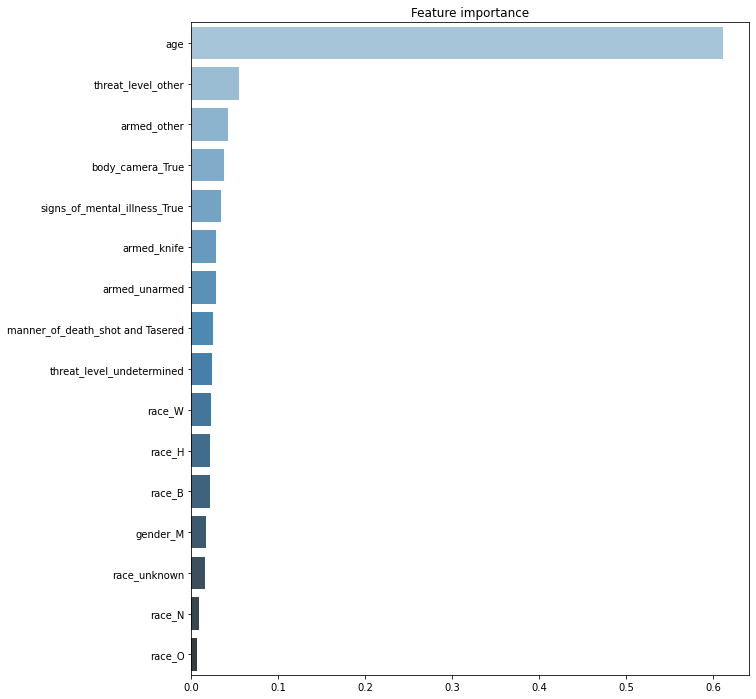

In [100]:
# Next we check feature importance
params = {'random_state': 0, 'n_jobs': 4, 'n_estimators': 1000, 'max_depth': None, 'class_weight': 'balanced'}

# Fit RandomForest Classifier
clf = RandomForestClassifier(**params)
clf = clf.fit(X_train, y_train)

# Plot features importances
imp = pd.Series(data=clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="Blues_d", orient='h')

In [101]:
# Modifying the features
X = fpsd_ml_flee_dum[['age', 'threat_level_other', 'threat_level_undetermined']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 833)

# Next setting up Random Forest classifier
params = {'random_state': 0, 'n_jobs': 4, 'n_estimators': 1000, 'max_depth': None, 'class_weight': 'balanced'}

# Fit RandomForest Classifier
f_clf = RandomForestClassifier(**params)
f_clf = f_clf.fit(X_train, y_train)
y_model = f_clf.predict(X_test)

# Testing the model
print('Random Forest classifier method with reduced features \n')
print(f'labels: {list(le.classes_)} and codes: {list(range(0,len(list(le.classes_))))}\n')
print(metrics.classification_report(y_test, y_model, zero_division=1))

Random Forest classifier method with reduced features 

labels: ['Car', 'Foot', 'Not fleeing', 'Other'] and codes: [0, 1, 2, 3]

              precision    recall  f1-score   support

           0       0.22      0.35      0.27       289
           1       0.15      0.24      0.18       221
           2       0.76      0.34      0.47      1066
           3       0.02      0.16      0.04        49

    accuracy                           0.32      1625
   macro avg       0.29      0.27      0.24      1625
weighted avg       0.56      0.32      0.38      1625



Flee Method ML conclusion:
*   The data is imbalanced as majority of the victims did not try to flee. In the above analysis we have tried to handle the imbalance and get a relevant model
*   To select which model is best we look at the f1-score (since imbalanced data). We see that the highest macro and weighted avg of f1-score is attained for the Random Forest classifier model (without dropping any variables). However, the macro and weighted avg of f1-score values are 0.31 and 0.53 respectively which are not that good. Thus we can not accurately predict whether the victim tried to flee or not.
*   We may have to employ complex deep learning algorithms to get a better model.

### Trying to predict the **Age** of the victim

In [102]:
# Getting the data ready with dummies
fpsd_ml_age_dum = pd.get_dummies(fpsd_ml, columns=['manner_of_death', 'armed', 'gender',
       'race', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'], drop_first = True)

In [103]:
# Implementing Linear Regression model
X = fpsd_ml_age_dum.drop('age', axis=1)
y = fpsd_ml_age_dum['age']
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=833)

model = LinearRegression()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)
test = Xtest.join(ytest).reset_index()
test.join(pd.Series(y_model, name='predicted')).head()

# Checking the performance metrics
print('Coefficients:%s, intercept %.2f'%(model.coef_, model.intercept_))
print("Residual sum of squares: %.2f"% np.mean((model.predict(Xtest) - ytest) ** 2))
print('R-squared Score: %.2f' % model.score(Xtest, ytest))

Coefficients:[ 0.25575037 -1.84920101 -1.72157503 -4.23929447  1.02696981 -2.94600306
 -1.85789835 -3.77667446 -2.7277103   3.46849395  6.15051486  1.09913004
 -0.4055692  -0.86735236 -1.25676577  4.28709909 -1.25611337 -0.38608253], intercept 33.08
Residual sum of squares: 142.58
R-squared Score: 0.13


In [104]:
# Implementing Lasso Regression model
alpha = 0.1
lasso = Lasso(max_iter=10000, alpha=alpha)
y_pred_lasso = lasso.fit(Xtrain, ytrain).predict(Xtest)
print(y_pred_lasso)

# Checking the performance metrics
r2_score_lasso = r2_score(ytest, y_pred_lasso)
print("R-squared : %f" % r2_score_lasso)

[33.10781065 40.96061646 35.13325137 ... 36.21365175 41.63573647
 41.09572808]
R-squared : 0.126826


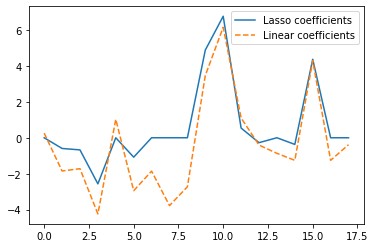

In [105]:
# Drawing difference between linear model and Lasso model
plt.plot(lasso.coef_, label='Lasso coefficients')
plt.plot(model.coef_, '--', label='Linear coefficients')
plt.legend(loc='best')
plt.show()

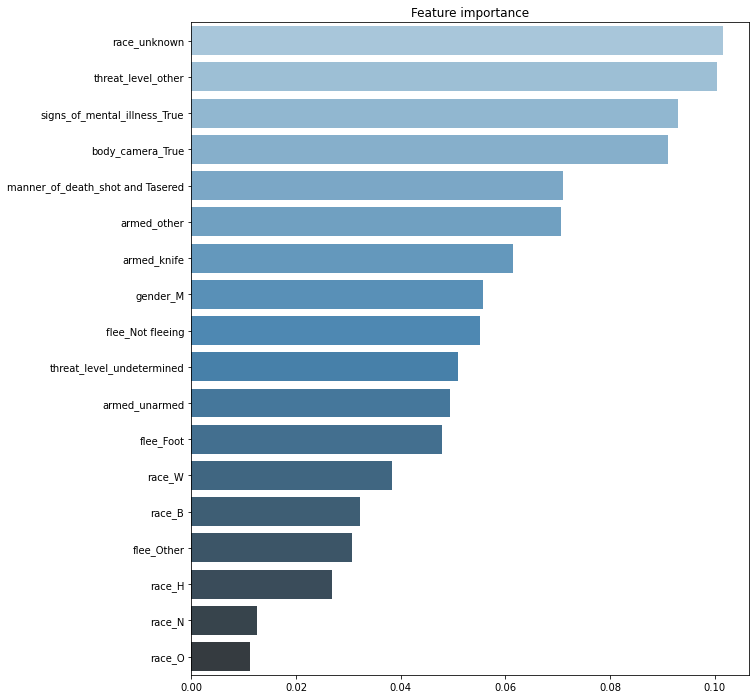

In [106]:
# Checking the feature importance
params = {'random_state': 0, 'n_jobs': 4, 'n_estimators': 5000, 'max_depth': 8}
clf = RandomForestClassifier(**params)
clf = clf.fit(X, y)
imp = pd.Series(data=clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="Blues_d", orient='h')

In [107]:
# Removing race-related columns
fpsd_ml_age_dum = fpsd_ml_age_dum.drop(['race_unknown', 'race_W', 'race_B','race_H','race_N','race_O'], axis =1)

# Implementing Linear Regression model
X = fpsd_ml_age_dum.drop('age', axis=1)
y = fpsd_ml_age_dum['age']
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=833)
model = LinearRegression()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)
test = Xtest.join(ytest).reset_index()
test.join(pd.Series(y_model, name='predicted')).head()
mean_absolute_error(ytest, y_model)

# Checking model performance
print('Coefficients:%s, intercept %.2f'%(model.coef_, model.intercept_))
print("Residual sum of squares: %.2f"% np.mean((model.predict(Xtest) - ytest) ** 2))
print('R-squared Score: %.2f' % model.score(Xtest, ytest))

Coefficients:[ 0.12828654 -2.02845854 -1.83161315 -5.30711232  0.59033374  1.9860364
 -0.57752548 -0.60086937 -2.16621504  4.41043883 -1.50463908 -1.22628728], intercept 34.67
Residual sum of squares: 153.62
R-squared Score: 0.07


Conclusions for Age ML models:


*   The residual sum of squared of linear regression model is 142.58 and the R-squared is 0.13, which means the model didn't fit the dataset well. 

*   There is no obvious linear relationship between age and other variables so it's not accurate to predict the age of victims based on existing features.

* We also tried Lasso Regression which again did not give good results.

*   We used random forest model to explore the importance of features and we found that race was the least important feature to predict age, so we decided to drop it. After we removed the dummy variables of race, the residual sum of squared of linear regression model increased to 153.62 and the R-squared decreased to 0.07. The fitness is even worse compared with the previous model. It indicates that we don't have enough information to predict the age of victims. 

# Overall Conclusion

* We realized that California had the most deaths by fatal police shootings, so we decided to use a new dataset for our storyline that only had California's values and we presented the metrics specific to that state.
* After further investigation and with the combination of other datasets, we figured that even though California had the highest number of fatal police shootings followed by Texas, Alaska had the highest density of fatal police shootings followed by New Mexico. 
* Once again, with the combination of another dataset, we realized that even though the white population had the highest number of victims, in proportion, they were actually ranked last, with Black victims per million being more than twice that of White victims per million.
* Finally, the only model that actually made sense with our analysis is the model about mental illness. 